# COGS 108 - EDA Checkpoint

# Names

- Aakshi Kochhar
- Jaslina Kochhar
- Pavithra Pandian
- Nidhi Satyadev
- Rawan Alkhafaf

<a id='research_question'></a>
# Research Question

Using data collected over the past 20 years, how has a country’s economic growth correlated to its respective air quality index (AQI)? Specifically, for these countries: Bangladesh, Brazil, Japan, Germany, USA, India, China, Singapore, and Guyana.

Research will be conducted privately. We are looking for a correlation between economic growth and AQI’s. We have not taken all variables into account.

Hypothesis: We believe that as a country’s economy grows, their Air Quality Index level becomes worse. Thus, as the GDP of a country increases, so does the level of their AQI.


# Setup

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm, bernoulli, poisson, ttest_ind, chisquare, normaltest
import patsy
import statsmodels.api as sm



# Data Cleaning

Describe your data cleaning steps here.

In [2]:
#read the datasets we will be using 

#dataset 1
global_affair = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8YnKxQivPFo-kVGrFadG_s2UEkRz2_LOqvgn_7qynMVG7FwHCTaWqXRREnzGY9IZnmgnc6TqorzAC/pub?output=csv')

#dataset 4
bangladesh_econ = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSVQ69GxKx0WjSooN_96hQ_3LVju2qht9Vzhk0cYulp07HYvjOW33Cm5CejrD7jes_ZF33pO7Ec-uYk/pub?output=csv')

#dataset 5
world_devel = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSsYUFW2bpgOTOAi4JoDBUr07VUjF4Hn3bLzJJ2StyhO_1X68_RS6aJhxg6J1c9ooP8wsYdNmk8r2mK/pub?output=csv')

In [3]:
global_affair = global_affair[['Country', 'Exposure Lower', 'Exposure Upper', 'Year', 'Pollutant', 'Pollutant Name', 'Region Name', 'Units']]
global_affair['Units'].unique()
#all of the units are in 'µg/m3'
#renamed column name, rest of the dataset is clean

array(['µg/m3'], dtype=object)

In [4]:
global_affair = global_affair[['Country', 'Exposure Lower', 'Exposure Upper', 'Year', 'Pollutant', 'Pollutant Name', 'Region Name']]
global_affair.head()

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
0,Afghanistan,21.0,92.9,1990,pm25,PM25,Country
1,Afghanistan,23.1,91.9,1995,pm25,PM25,Country
2,Afghanistan,26.5,92.7,2000,pm25,PM25,Country
3,Afghanistan,26.1,77.0,2005,pm25,PM25,Country
4,Afghanistan,32.5,77.9,2010,pm25,PM25,Country


In [5]:
global_affair['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland

In [6]:
bangladesh_aqi = global_affair.loc[global_affair['Country']=='Bangladesh']
bangladesh_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
196,Bangladesh,27.3,92.2,1990,pm25,PM25,Country
197,Bangladesh,29.1,86.8,1995,pm25,PM25,Country
198,Bangladesh,32.9,83.5,2000,pm25,PM25,Country
199,Bangladesh,38.0,76.8,2005,pm25,PM25,Country
200,Bangladesh,46.6,68.4,2010,pm25,PM25,Country
201,Bangladesh,51.5,70.9,2011,pm25,PM25,Country
202,Bangladesh,59.7,80.4,2012,pm25,PM25,Country
203,Bangladesh,57.4,77.1,2013,pm25,PM25,Country
204,Bangladesh,63.5,84.5,2014,pm25,PM25,Country
205,Bangladesh,60.0,79.9,2015,pm25,PM25,Country


In [7]:
brazil_aqi = global_affair.loc[global_affair['Country']=='Brazil']
brazil_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
350,Brazil,7.32,26.6,1990,pm25,PM25,Country
351,Brazil,8.17,23.8,1995,pm25,PM25,Country
352,Brazil,9.31,22.1,2000,pm25,PM25,Country
353,Brazil,10.50,19.7,2005,pm25,PM25,Country
354,Brazil,12.80,15.5,2010,pm25,PM25,Country
355,Brazil,13.30,16.2,2011,pm25,PM25,Country
356,Brazil,12.50,15.1,2012,pm25,PM25,Country
357,Brazil,12.00,14.6,2013,pm25,PM25,Country
358,Brazil,11.80,14.4,2014,pm25,PM25,Country
359,Brazil,10.60,12.9,2015,pm25,PM25,Country


In [8]:
japan_aqi = global_affair.loc[global_affair['Country']=='Japan']
japan_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
1260,Japan,6.84,22.8,1990,pm25,PM25,Country
1261,Japan,7.24,20.3,1995,pm25,PM25,Country
1262,Japan,7.92,19.6,2000,pm25,PM25,Country
1263,Japan,8.61,16.4,2005,pm25,PM25,Country
1264,Japan,10.40,12.7,2010,pm25,PM25,Country
1265,Japan,11.20,14.4,2011,pm25,PM25,Country
1266,Japan,11.20,15.2,2012,pm25,PM25,Country
1267,Japan,11.60,15.3,2013,pm25,PM25,Country
1268,Japan,12.80,14.7,2014,pm25,PM25,Country
1269,Japan,12.10,14.8,2015,pm25,PM25,Country


In [9]:
germany_aqi = global_affair.loc[global_affair['Country']=='Germany']
germany_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
952,Germany,10.8,35.7,1990,pm25,PM25,Country
953,Germany,10.9,29.4,1995,pm25,PM25,Country
954,Germany,10.3,24.9,2000,pm25,PM25,Country
955,Germany,11.1,20.3,2005,pm25,PM25,Country
956,Germany,15.8,16.4,2010,pm25,PM25,Country
957,Germany,15.3,15.9,2011,pm25,PM25,Country
958,Germany,13.6,14.1,2012,pm25,PM25,Country
959,Germany,13.3,13.8,2013,pm25,PM25,Country
960,Germany,12.0,12.5,2014,pm25,PM25,Country
961,Germany,12.5,13.0,2015,pm25,PM25,Country


In [10]:
USA_aqi = global_affair.loc[global_affair['Country']=='United States of America']
USA_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
2716,United States of America,7.41,23.50,1990,pm25,PM25,Country
2717,United States of America,7.34,21.00,1995,pm25,PM25,Country
2718,United States of America,7.44,17.60,2000,pm25,PM25,Country
2719,United States of America,8.04,14.40,2005,pm25,PM25,Country
2720,United States of America,9.09,9.37,2010,pm25,PM25,Country
2721,United States of America,9.12,9.40,2011,pm25,PM25,Country
2722,United States of America,8.73,9.01,2012,pm25,PM25,Country
2723,United States of America,8.50,8.78,2013,pm25,PM25,Country
2724,United States of America,8.31,8.57,2014,pm25,PM25,Country
2725,United States of America,8.04,8.28,2015,pm25,PM25,Country


In [11]:
india_aqi = global_affair.loc[global_affair['Country']=='India']
india_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
1148,India,36.2,126.0,1990,pm25,PM25,Country
1149,India,36.4,108.0,1995,pm25,PM25,Country
1150,India,43.9,107.0,2000,pm25,PM25,Country
1151,India,50.3,97.0,2005,pm25,PM25,Country
1152,India,65.6,88.6,2010,pm25,PM25,Country
1153,India,71.5,89.1,2011,pm25,PM25,Country
1154,India,78.9,94.3,2012,pm25,PM25,Country
1155,India,81.7,98.1,2013,pm25,PM25,Country
1156,India,86.9,104.0,2014,pm25,PM25,Country
1157,India,81.2,96.3,2015,pm25,PM25,Country


In [12]:
china_aqi = global_affair.loc[global_affair['Country']=='China']
china_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
518,China,25.3,86.0,1990,pm25,PM25,Country
519,China,28.6,79.2,1995,pm25,PM25,Country
520,China,33.2,76.5,2000,pm25,PM25,Country
521,China,37.8,69.3,2005,pm25,PM25,Country
522,China,50.4,56.4,2010,pm25,PM25,Country
523,China,51.4,66.4,2011,pm25,PM25,Country
524,China,51.3,67.7,2012,pm25,PM25,Country
525,China,56.6,70.8,2013,pm25,PM25,Country
526,China,57.7,62.9,2014,pm25,PM25,Country
527,China,53.9,58.5,2015,pm25,PM25,Country


In [13]:
singapore_aqi = global_affair.loc[global_affair['Country']=='Singapore']
singapore_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
2282,Singapore,8.72,45.6,1990,pm25,PM25,Country
2283,Singapore,8.91,31.5,1995,pm25,PM25,Country
2284,Singapore,11.20,28.3,2000,pm25,PM25,Country
2285,Singapore,10.70,23.7,2005,pm25,PM25,Country
2286,Singapore,11.10,20.2,2010,pm25,PM25,Country
2287,Singapore,12.10,21.9,2011,pm25,PM25,Country
2288,Singapore,13.00,23.8,2012,pm25,PM25,Country
2289,Singapore,13.80,25.2,2013,pm25,PM25,Country
2290,Singapore,13.40,22.9,2014,pm25,PM25,Country
2291,Singapore,13.60,24.3,2015,pm25,PM25,Country


In [14]:
guyana_aqi = global_affair.loc[global_affair['Country']=='Guyana']
guyana_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
1078,Guyana,7.66,49.8,1990,pm25,PM25,Country
1079,Guyana,7.92,49.4,1995,pm25,PM25,Country
1080,Guyana,9.59,54.4,2000,pm25,PM25,Country
1081,Guyana,9.30,43.0,2005,pm25,PM25,Country
1082,Guyana,9.88,42.4,2010,pm25,PM25,Country
1083,Guyana,9.74,39.2,2011,pm25,PM25,Country
1084,Guyana,10.70,41.4,2012,pm25,PM25,Country
1085,Guyana,10.30,39.8,2013,pm25,PM25,Country
1086,Guyana,9.89,38.9,2014,pm25,PM25,Country
1087,Guyana,10.60,42.4,2015,pm25,PM25,Country


In [15]:
bangladesh_econ.head()
bangladesh_econ.columns
bangladesh_econ = bangladesh_econ[['Year', 'GDP', 'GDP per capita', 'GDP growth', 'Inflation rate', 'Total Investment']]
bangladesh_econ.head()
#dropped columns to remove N/A data because we do not want N/A spaces in the dataset 
#unemployed rate was not found in bangladesh's data 
#government rate was not found in bangladesh's data 
#GDP and other data presented is enough to reflect on our hypothesis
#other columns in dataset are clean

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Total Investment
0,1980,41.2,500,3.10%,15.40%,14.44%
1,1981,47.4,560,5.60%,14.50%,17.16%
2,1982,52.0,597,3.20%,12.90%,17.36%
3,1983,56.5,633,4.60%,9.50%,16.56%
4,1984,61.0,664,4.20%,10.40%,16.48%


In [16]:
#check the datatypes of each series
bangladesh_econ.dtypes

Year                  int64
GDP                 float64
GDP per capita       object
GDP growth           object
Inflation rate       object
Total Investment     object
dtype: object

In [17]:
#function to remove the percent signs
def rem_perc(string):
    
    string = string.lower()
    string = string.strip()

    string = string.replace('%', '')

    # restrip the output
    string = string.strip()
    
    output = float(string);
    
    return output

In [18]:
#remove the percent signs from 'GDP growth' series
bangladesh_econ['GDP growth'] = bangladesh_econ['GDP growth'].apply(rem_perc);

In [19]:
#remove the percent signs from 'Inflation rate' series
bangladesh_econ['Inflation rate'] = bangladesh_econ['Inflation rate'].apply(rem_perc);

In [20]:
#remove the percent signs from 'Total Investment' series
bangladesh_econ['Total Investment'] = bangladesh_econ['Total Investment'].apply(rem_perc);

In [21]:
#function to remove the commas
def rem_commas(string):
    
    string = string.lower()
    string = string.strip()

    string = string.replace(',', '')

    # restrip the output
    string = string.strip()
    
    output = int(string);
    
    return output

In [22]:
#remove the commas from 'GDP per capita' series
bangladesh_econ['GDP per capita'] = bangladesh_econ['GDP per capita'].apply(rem_commas);

In [23]:
#re-check the datatypes of each series to make sure they are correct
bangladesh_econ.dtypes

Year                  int64
GDP                 float64
GDP per capita        int64
GDP growth          float64
Inflation rate      float64
Total Investment    float64
dtype: object

In [24]:
bangladesh_econ.head()
# the data now is clean and doesn't contain any % or ,

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Total Investment
0,1980,41.2,500,3.1,15.4,14.44
1,1981,47.4,560,5.6,14.5,17.16
2,1982,52.0,597,3.2,12.9,17.36
3,1983,56.5,633,4.6,9.5,16.56
4,1984,61.0,664,4.2,10.4,16.48


In [25]:
world_devel.head()
#this dataset is clean

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Bangladesh,BGD,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,100,..,..,..,..,100,...,100,100,100,100,100,100,100,..,..,..
1,Brazil,BRA,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,90.79140477,..,..,..,..,89.78408308,...,91.92837459,86.82923025,85.33471375,77.11647309,74.92775153,67.95255918,68.13503006,..,..,..
2,Japan,JPN,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,91.74729438,..,..,..,..,92.09008334,...,92.56048747,89.13152401,89.80213203,87.81962942,88.66865042,75.41211147,76.76150823,..,..,..
3,Germany,DEU,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,99.40718619,..,..,..,..,99.18486098,...,99.44802945,98.29506796,97.84632154,95.72529588,95.95259594,89.15466272,89.17435643,..,..,..
4,United States,USA,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,43.08134508,..,..,..,..,44.22056176,...,46.68619853,28.65808101,20.84055734,11.73129721,8.465306507,3.334435592,3.34317037,..,..,..


In [26]:
#dataset with TONS of new data that we can use 
new_variables = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRYYV59fl0-Y0y4Eyxh9pG5d3T1hz2bNNjFiUB17nkR9kYrDkLkHmZJ-9cOOqBt8XkHn_0CfFC6sQwI/pub?output=csv")
new_variables.head()

,Unnamed: 0,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,ABW,CM.MKT.LCAP.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,CM.MKT.LCAP.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AGO,CM.MKT.LCAP.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ALB,CM.MKT.LCAP.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AND,CM.MKT.LCAP.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#find row with country codes using additional csv file that was provided with the dataset 
#Bangladesh code = BGD
#inflation rate code = FP.CPI.TOTL.ZG
bgd = new_variables.loc[new_variables['Country Code'] == 'BGD'] #this dataset has all the data for bangladesh 
bgd_inflation = bgd.loc[bgd['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for bangladesh inflation data
bgd_inflation = bgd_inflation.T
bgd_inflation = bgd_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
bgd_inflation = bgd_inflation.rename(columns = {1074: 'Annual inflation rate'})
bgd_inflation.index.name = 'Year'
bgd_inflation = bgd_inflation.dropna() #dropped the 2019 NaN value because there was no data reported for 2019.
bgd_inflation['Annual inflation rate'] = pd.to_numeric(bgd_inflation['Annual inflation rate'], downcast = 'float')
bgd_inflation

,Annual inflation rate
Year,
2000,2.208256
2001,2.007174
2002,3.332565
2003,5.668708
2004,7.587536
2005,7.046618
2006,6.765261
2007,9.106985
2008,8.901945


In [28]:
#Brazil code = BRA
#inflation rate code = FP.CPI.TOTL.ZG
braz = new_variables.loc[new_variables['Country Code'] == 'BRA'] #this dataset has all the data for brazil 
braz_inflation = braz.loc[braz['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for brazil inflation data
braz_inflation = braz_inflation.T
braz_inflation = braz_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
braz_inflation = braz_inflation.rename(columns = {1083: 'Annual inflation rate'})
braz_inflation.index.name = 'Year'
braz_inflation = braz_inflation.dropna()
braz_inflation['Annual inflation rate'] = pd.to_numeric(braz_inflation['Annual inflation rate'], downcast = 'float')
braz_inflation

,Annual inflation rate
Year,
2000,7.044141
2001,6.840359
2002,8.450165
2003,14.714920
2004,6.597185
2005,6.869537
2006,4.183568
2007,3.641273
2008,5.678594


In [29]:
#Japan code = JPN
#inflation rate code = FP.CPI.TOTL.ZG
jpn = new_variables.loc[new_variables['Country Code'] == 'JPN'] #this dataset has all the data for japan 
jpn_inflation = jpn.loc[jpn['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for japan inflation data
jpn_inflation = jpn_inflation.T
jpn_inflation = jpn_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
jpn_inflation = jpn_inflation.rename(columns = {1173: 'Annual inflation rate'})
jpn_inflation.index.name = 'Year'
jpn_inflation = jpn_inflation.dropna()
jpn_inflation['Annual inflation rate'] = pd.to_numeric(jpn_inflation['Annual inflation rate'], downcast = 'float')
jpn_inflation

,Annual inflation rate
Year,
2000,-0.676579
2001,-0.740056
2002,-0.923494
2003,-0.256542
2004,-0.008573
2005,-0.282946
2006,0.249355
2007,0.060039
2008,1.380079


In [30]:
#Germany code = DEU
#inflation rate code = FP.CPI.TOTL.ZG
germany = new_variables.loc[new_variables['Country Code'] == 'DEU'] #this dataset has all the data for germany 
germany_inflation = germany.loc[germany['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for germany inflation data
germany_inflation = germany_inflation.T
germany_inflation = germany_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
germany_inflation = germany_inflation.rename(columns = {1109: 'Annual inflation rate'})
germany_inflation.index.name = 'Year'
germany_inflation = germany_inflation.dropna()
germany_inflation['Annual inflation rate'] = pd.to_numeric(germany_inflation['Annual inflation rate'], downcast = 'float')
germany_inflation

,Annual inflation rate
Year,
2000,1.440268
2001,1.983857
2002,1.420806
2003,1.034228
2004,1.665733
2005,1.546910
2006,1.577428
2007,2.298342
2008,2.628382


In [31]:
#USA code = USA
#inflation rate code = FP.CPI.TOTL.ZG
USA_new = new_variables.loc[new_variables['Country Code'] == 'USA'] #this dataset has all the data for USA 
USA_inflation = USA_new.loc[USA_new['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for USA inflation data
USA_inflation = USA_inflation.T
USA_inflation = USA_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
USA_inflation = USA_inflation.rename(columns = {1305: 'Annual inflation rate'})
USA_inflation.index.name = 'Year'
USA_inflation = USA_inflation.dropna()
USA_inflation['Annual inflation rate'] = pd.to_numeric(USA_inflation['Annual inflation rate'], downcast = 'float')
USA_inflation

,Annual inflation rate
Year,
2000,3.376857
2001,2.826171
2002,1.586032
2003,2.270095
2004,2.677237
2005,3.392747
2006,3.225944
2007,2.852673
2008,3.839100


In [32]:
#India code = IND
#inflation rate code = FP.CPI.TOTL.ZG
ind = new_variables.loc[new_variables['Country Code'] == 'IND'] #this dataset has all the data for india 
ind_inflation = ind.loc[ind['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for india inflation data
ind_inflation = ind_inflation.T
ind_inflation = ind_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
ind_inflation = ind_inflation.rename(columns = {1163: 'Annual inflation rate'})
ind_inflation.index.name = 'Year'
ind_inflation = ind_inflation.dropna()
ind_inflation['Annual inflation rate'] = pd.to_numeric(ind_inflation['Annual inflation rate'], downcast = 'float')
ind_inflation

,Annual inflation rate
Year,
2000,4.009436
2001,3.779293
2002,4.297152
2003,3.805859
2004,3.767252
2005,4.246344
2006,5.796524
2007,6.372881
2008,8.349267


In [33]:
#China code = CHN
#inflation rate code = FP.CPI.TOTL.ZG
chn = new_variables.loc[new_variables['Country Code'] == 'CHN'] #this dataset has all the data for china 
chn_inflation = chn.loc[chn['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for china inflation data
chn_inflation = chn_inflation.T
chn_inflation = chn_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
chn_inflation = chn_inflation.rename(columns = {1094: 'Annual inflation rate'})
chn_inflation.index.name = 'Year'
chn_inflation = chn_inflation.dropna()
chn_inflation['Annual inflation rate'] = pd.to_numeric(chn_inflation['Annual inflation rate'], downcast = 'float')
chn_inflation

,Annual inflation rate
Year,
2000,0.347806
2001,0.719132
2002,-0.731975
2003,1.127602
2004,3.824638
2005,1.776416
2006,1.649433
2007,4.816765
2008,5.925255


In [34]:
#singapore code = SGP
#inflation rate code = FP.CPI.TOTL.ZG
sgp = new_variables.loc[new_variables['Country Code'] == 'SGP'] #this dataset has all the data for singapore 
sgp_inflation = sgp.loc[sgp['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for singapore inflation data
sgp_inflation = sgp_inflation.T
sgp_inflation = sgp_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
sgp_inflation = sgp_inflation.rename(columns = {1262: 'Annual inflation rate'})
sgp_inflation.index.name = 'Year'
sgp_inflation = sgp_inflation.dropna()
sgp_inflation['Annual inflation rate'] = pd.to_numeric(sgp_inflation['Annual inflation rate'], downcast = 'float')
sgp_inflation

,Annual inflation rate
Year,
2000,1.361624
2001,0.997198
2002,-0.391677
2003,0.507905
2004,1.662727
2005,0.425106
2006,0.963047
2007,2.104926
2008,6.627997


In [35]:
#guyana code = GUY
#inflation rate code = FP.CPI.TOTL.ZG
guy = new_variables.loc[new_variables['Country Code'] == 'GUY'] #this dataset has all the data for guyana 
guy_inflation = guy.loc[guy['Indicator Code'] == 'FP.CPI.TOTL.ZG'] #this dataset is only for guyana inflation data
guy_inflation = guy_inflation.T
guy_inflation = guy_inflation.drop(['Unnamed: 0', 'Country Code', 'Indicator Code'], axis = 0)
guy_inflation = guy_inflation.rename(columns = {1148: 'Annual inflation rate'})
guy_inflation.index.name = 'Year'
guy_inflation = guy_inflation.dropna()
guy_inflation['Annual inflation rate'] = pd.to_numeric(guy_inflation['Annual inflation rate'], downcast = 'float')
guy_inflation

,Annual inflation rate
Year,
2000,6.148543
2001,2.627413
2002,5.341015
2003,5.980978
2004,4.668466
2005,6.925543
2006,6.677158
2007,12.200154
2008,8.102022


### Merging AQI + Inflation Datasets

In [36]:
bgd_inflation = bgd_inflation.rename_axis('Year').reset_index()
bgd_inflation['Year'] = bgd_inflation['Year'].astype(int)

In [37]:
new_bangladesh = bangladesh_aqi[['Year','Exposure Lower', 'Exposure Upper']]

In [38]:
bgd_aqi_inf_corr = new_bangladesh.merge(bgd_inflation, on = 'Year', how = 'inner')
bgd_aqi_inf_corr = bgd_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
bgd_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,32.9,83.5,2.208256
1,2005,38.0,76.8,7.046618
2,2010,46.6,68.4,8.126677
3,2011,51.5,70.9,11.395165
4,2012,59.7,80.4,6.217504
5,2013,57.4,77.1,7.530406
6,2014,63.5,84.5,6.991639
7,2015,60.0,79.9,6.194280
8,2016,59.1,77.9,5.513526
9,2017,54.5,73.1,5.702070


In [39]:
braz_inflation = braz_inflation.rename_axis('Year').reset_index()
braz_inflation['Year'] = braz_inflation['Year'].astype(int)

In [40]:
new_brazil = brazil_aqi[['Year','Exposure Lower', 'Exposure Upper']]

In [41]:
braz_aqi_inf_corr = new_brazil.merge(braz_inflation, on = 'Year', how = 'inner')
braz_aqi_inf_corr = braz_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
braz_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,9.31,22.1,7.044141
1,2005,10.50,19.7,6.869537
2,2010,12.80,15.5,5.038727
3,2011,13.30,16.2,6.636450
4,2012,12.50,15.1,5.403499
5,2013,12.00,14.6,6.204311
6,2014,11.80,14.4,6.329040
7,2015,10.60,12.9,9.029901
8,2016,10.30,12.7,8.739143
9,2017,9.84,14.0,3.446373


In [42]:
jpn_inflation = jpn_inflation.rename_axis('Year').reset_index()
jpn_inflation['Year'] = jpn_inflation['Year'].astype(int)
new_japan = japan_aqi[['Year','Exposure Lower', 'Exposure Upper']]
japan_aqi_inf_corr = new_japan.merge(jpn_inflation, on = 'Year', how = 'inner')
japan_aqi_inf_corr = japan_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
japan_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,7.92,19.6,-0.676579
1,2005,8.61,16.4,-0.282946
2,2010,10.40,12.7,-0.719979
3,2011,11.20,14.4,-0.267634
4,2012,11.20,15.2,-0.051939
5,2013,11.60,15.3,0.346440
6,2014,12.80,14.7,2.761954
7,2015,12.10,14.8,0.789518
8,2016,11.90,15.0,-0.116667
9,2017,11.30,16.2,0.467212


In [43]:
germany_inflation = germany_inflation.rename_axis('Year').reset_index()
germany_inflation['Year'] = germany_inflation['Year'].astype(int)
new_germany = germany_aqi[['Year','Exposure Lower', 'Exposure Upper']]
germany_aqi_inf_corr = new_germany.merge(germany_inflation, on = 'Year', how = 'inner')
germany_aqi_inf_corr = germany_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
germany_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,10.3,24.9,1.440268
1,2005,11.1,20.3,1.546910
2,2010,15.8,16.4,1.103809
3,2011,15.3,15.9,2.075175
4,2012,13.6,14.1,2.008491
5,2013,13.3,13.8,1.504721
6,2014,12.0,12.5,0.906798
7,2015,12.5,13.0,0.514421
8,2016,11.6,12.0,0.491749
9,2017,11.7,12.1,1.509497


In [44]:
USA_inflation = USA_inflation.rename_axis('Year').reset_index()
USA_inflation['Year'] = USA_inflation['Year'].astype(int)
new_USA = USA_aqi[['Year','Exposure Lower', 'Exposure Upper']]
USA_aqi_inf_corr = new_USA.merge(USA_inflation, on = 'Year', how = 'inner')
USA_aqi_inf_corr = USA_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
USA_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,7.44,17.60,3.376857
1,2005,8.04,14.40,3.392747
2,2010,9.09,9.37,1.640043
3,2011,9.12,9.40,3.156842
4,2012,8.73,9.01,2.069337
5,2013,8.50,8.78,1.464833
6,2014,8.31,8.57,1.622223
7,2015,8.04,8.28,0.118627
8,2016,7.26,7.50,1.261583
9,2017,7.63,7.86,2.130110


In [45]:
ind_inflation = ind_inflation.rename_axis('Year').reset_index()
ind_inflation['Year'] = ind_inflation['Year'].astype(int)
new_india = india_aqi[['Year','Exposure Lower', 'Exposure Upper']]
india_aqi_inf_corr = new_india.merge(ind_inflation, on = 'Year', how = 'inner')
india_aqi_inf_corr = india_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
india_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,43.9,107.0,4.009436
1,2005,50.3,97.0,4.246344
2,2010,65.6,88.6,11.989390
3,2011,71.5,89.1,8.858361
4,2012,78.9,94.3,9.312446
5,2013,81.7,98.1,10.907643
6,2014,86.9,104.0,6.353195
7,2015,81.2,96.3,5.872427
8,2016,84.3,101.0,4.941027
9,2017,74.8,89.3,2.490887


In [46]:
chn_inflation = chn_inflation.rename_axis('Year').reset_index()
chn_inflation['Year'] = chn_inflation['Year'].astype(int)
new_china = china_aqi[['Year','Exposure Lower', 'Exposure Upper']]
china_aqi_inf_corr = new_china.merge(chn_inflation, on = 'Year', how = 'inner')
china_aqi_inf_corr = china_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
china_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,33.2,76.5,0.347806
1,2005,37.8,69.3,1.776416
2,2010,50.4,56.4,3.175328
3,2011,51.4,66.4,5.553897
4,2012,51.3,67.7,2.619526
5,2013,56.6,70.8,2.621049
6,2014,57.7,62.9,1.921643
7,2015,53.9,58.5,1.437024
8,2016,49.5,53.7,2.000000
9,2017,48.1,51.8,1.593137


In [47]:
sgp_inflation = sgp_inflation.rename_axis('Year').reset_index()
sgp_inflation['Year'] = sgp_inflation['Year'].astype(int)
new_singapore = singapore_aqi[['Year','Exposure Lower', 'Exposure Upper']]
singapore_aqi_inf_corr = new_singapore.merge(sgp_inflation, on = 'Year', how = 'inner')
singapore_aqi_inf_corr = singapore_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
singapore_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,11.2,28.3,1.361624
1,2005,10.7,23.7,0.425106
2,2010,11.1,20.2,2.823277
3,2011,12.1,21.9,5.247910
4,2012,13.0,23.8,4.575960
5,2013,13.8,25.2,2.358601
6,2014,13.4,22.9,1.024983
7,2015,13.6,24.3,-0.522752
8,2016,13.2,23.2,-0.532286
9,2017,13.2,25.1,0.576325


In [48]:
guy_inflation = guy_inflation.rename_axis('Year').reset_index()
guy_inflation['Year'] = guy_inflation['Year'].astype(int)
new_guyana = guyana_aqi[['Year','Exposure Lower', 'Exposure Upper']]
guyana_aqi_inf_corr = new_guyana.merge(guy_inflation, on = 'Year', how = 'inner')
guyana_aqi_inf_corr = guyana_aqi_inf_corr[['Year', 'Exposure Lower', 'Exposure Upper', 'Annual inflation rate']]
guyana_aqi_inf_corr

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,9.59,54.4,6.148543
1,2005,9.30,43.0,6.925543
2,2010,9.88,42.4,3.733378
3,2011,9.74,39.2,4.977736
4,2012,10.70,41.4,2.391935
5,2013,10.30,39.8,1.901252
6,2014,9.89,38.9,0.852630
7,2015,10.60,42.4,-1.001734
8,2016,10.10,41.0,0.836008
9,2017,9.39,39.6,1.904656


In [49]:
inflation_aqi_all = [bgd_aqi_inf_corr, braz_aqi_inf_corr, japan_aqi_inf_corr, germany_aqi_inf_corr, USA_aqi_inf_corr, india_aqi_inf_corr, china_aqi_inf_corr, singapore_aqi_inf_corr, guyana_aqi_inf_corr]
inflation_aqi_df = pd.concat(inflation_aqi_all)
inflation_aqi_df

,Year,Exposure Lower,Exposure Upper,Annual inflation rate
0,2000,32.90,83.5,2.208256
1,2005,38.00,76.8,7.046618
2,2010,46.60,68.4,8.126677
3,2011,51.50,70.9,11.395165
4,2012,59.70,80.4,6.217504
...,...,...,...,...
7,2015,10.60,42.4,-1.001734
8,2016,10.10,41.0,0.836008
9,2017,9.39,39.6,1.904656
10,2018,9.19,38.7,1.282843


### Poverty Dataset

In [50]:
pov = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFl8ZSxB81QokI6gxXSJKGzQPytR1e0QA-r5K3oUU8xu3LPx1um_XfYXhFsNYHKHNRh9257VEO8Jo4/pub?gid=81790101&single=true&output=csv')
pov

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2021-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.000000,2017.0,2018.0,2019.0,2020.0
4,Aruba,ABW,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Zimbabwe,ZWE,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,49.7,NaN,NaN,NaN,NaN,NaN,51.1,NaN,NaN,NaN
7656,Zimbabwe,ZWE,Income share held by fourth 20%,SI.DST.04TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,NaN,NaN,NaN,NaN,NaN,20.6,NaN,NaN,NaN
7657,Zimbabwe,ZWE,Income share held by third 20%,SI.DST.03RD.20,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN
7658,Zimbabwe,ZWE,Income share held by second 20%,SI.DST.02ND.20,NaN,NaN,NaN,NaN,NaN,NaN,...,9.5,NaN,NaN,NaN,NaN,NaN,9.1,NaN,NaN,NaN


In [51]:
countries = ("United States", "India", "Bangladesh", "Brazil", "Japan", "China", "Singapore", "Germany", "Guyana")
pov = pov.loc[pov['Data Source'].isin(countries)]
pov = pov[["Data Source", "Unnamed: 2", "Unnamed: 43", "Unnamed: 44", "Unnamed: 45", "Unnamed: 46", "Unnamed: 47", "Unnamed: 48", "Unnamed: 49", "Unnamed: 50", "Unnamed: 51", "Unnamed: 52", "Unnamed: 53", "Unnamed: 54", "Unnamed: 55", "Unnamed: 56", "Unnamed: 57", "Unnamed: 58", "Unnamed: 59", "Unnamed: 60", "Unnamed: 61", "Unnamed: 62", "Unnamed: 63"]]
pov.columns = ["Country", "Indicator", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
pov = pov.loc[pov['Indicator'] == 'Gini index (World Bank estimate)']
pov

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
543,Bangladesh,Gini index (World Bank estimate),NaN,33.4,NaN,NaN,NaN,NaN,33.2,NaN,...,32.1,NaN,NaN,NaN,NaN,NaN,32.4,NaN,NaN,NaN
804,Brazil,Gini index (World Bank estimate),59.0,NaN,58.4,58.1,57.6,56.5,56.3,55.6,...,NaN,52.9,53.5,52.8,52.1,51.9,53.3,53.3,53.9,NaN
1123,China,Gini index (World Bank estimate),38.7,NaN,NaN,42.0,NaN,NaN,40.9,NaN,...,43.7,42.4,42.2,39.7,39.2,38.6,38.5,NaN,NaN,NaN
1558,Germany,Gini index (World Bank estimate),NaN,28.8,30.3,29.9,30.0,30.4,32.1,31.3,...,30.2,30.5,NaN,31.1,NaN,31.7,31.9,NaN,NaN,NaN
2689,Guyana,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3124,India,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,34.4,NaN,NaN,...,NaN,35.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3414,Japan,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.1,NaN,NaN,32.9,NaN,NaN,NaN,NaN,NaN,NaN
5995,Singapore,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7242,United States,Gini index (World Bank estimate),NaN,40.1,NaN,NaN,NaN,40.3,NaN,NaN,...,40.0,NaN,NaN,40.7,NaN,NaN,41.1,NaN,NaN,NaN


In [52]:
#Unemployment Dataset 
unemploy_rates = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSghnsrS5-6EyId1Krs-AzgJ0TlJS1J_G2vrHs6sHsMq_WZ05O1670GHgRvtPy7d08VwZBYKYqhHCgH/pub?gid=0&single=true&output=csv')

unemploy_rates

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.510000,11.52,11.540000,11.450000,11.390000,11.310000,11.180000,11.06,10.980000,11.73
2,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.360000,7.37,7.380000,7.310000,7.260000,7.200000,7.100000,7.00,6.930000,7.70
3,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.480000,13.38,15.870000,18.059999,17.190001,15.420000,13.620000,12.30,11.470000,11.70
4,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.080000,13.24,13.410000,13.470000,13.400000,13.310000,13.150000,13.01,12.900000,13.42
261,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.639999,24.73,24.559999,24.889999,25.150000,26.540001,27.040001,26.91,28.469999,28.74
262,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.340000,7.85,8.610000,9.340000,10.100000,10.880000,11.630000,12.01,11.910000,12.17


In [53]:
#rename all the columns and drop null values
unemploy_rates = unemploy_rates[['Country Name','Country Code','Indicator Code','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

unemploy_rates = unemploy_rates.dropna(how = 'all')
unemploy_rates.columns

Index(['Country Name', 'Country Code', 'Indicator Code', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [54]:
unemploy_rates.head()

,Country Name,Country Code,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SL.UEM.TOTL.ZS,11.380000,11.46,11.61,11.65,11.65,11.65,11.640000,...,11.51,11.52,11.54,11.450000,11.390000,11.31,11.18,11.06,10.98,11.73
2,Angola,AGO,SL.UEM.TOTL.ZS,3.750000,3.78,3.85,3.87,3.86,3.86,3.860000,...,7.36,7.37,7.38,7.310000,7.260000,7.20,7.10,7.00,6.93,7.70
3,Albania,ALB,SL.UEM.TOTL.ZS,16.219999,16.33,16.52,16.57,16.57,16.57,16.549999,...,13.48,13.38,15.87,18.059999,17.190001,15.42,13.62,12.30,11.47,11.70
4,Andorra,AND,SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#keep only the countries being used in this report
unemploy_rates = unemploy_rates[unemploy_rates["Country Name"].isin(["Bangladesh", "Brazil", "United States","Japan", "Germany", "India", "China", "Singapore", "Guyana"])] 
unemploy_rates

,Country Name,Country Code,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
18,Bangladesh,BGD,SL.UEM.TOTL.ZS,2.20,2.27,2.36,2.42,2.47,2.51,2.69,...,3.71,4.06,4.43,4.39,4.38,4.35,4.37,4.29,4.22,5.30
27,Brazil,BRA,SL.UEM.TOTL.ZS,6.37,6.42,6.03,6.24,6.42,7.25,8.16,...,6.92,7.19,6.98,6.66,8.43,11.60,12.82,12.33,11.93,13.67
38,China,CHN,SL.UEM.TOTL.ZS,2.40,2.40,2.70,2.90,3.00,3.10,3.20,...,4.50,4.60,4.60,4.60,4.60,4.50,4.40,4.30,4.60,5.00
53,Germany,DEU,SL.UEM.TOTL.ZS,5.32,6.32,7.68,8.73,8.16,8.83,9.86,...,5.82,5.38,5.23,4.98,4.62,4.12,3.75,3.38,3.14,4.31
92,Guyana,GUY,SL.UEM.TOTL.ZS,11.82,11.90,12.01,12.02,11.99,11.96,11.92,...,12.35,12.67,12.99,13.21,13.46,13.69,13.85,14.02,13.91,15.82
107,India,IND,SL.UEM.TOTL.ZS,5.55,5.61,5.72,5.75,5.75,5.75,5.74,...,5.65,5.66,5.67,5.60,5.56,5.51,5.41,5.33,5.27,7.11
117,Japan,JPN,SL.UEM.TOTL.ZS,2.10,2.20,2.50,2.90,3.20,3.40,3.40,...,4.52,4.30,4.00,3.60,3.40,3.10,2.80,2.40,2.40,2.97
206,Singapore,SGP,SL.UEM.TOTL.ZS,2.18,3.09,3.07,3.03,3.30,3.57,2.50,...,3.89,3.72,3.86,3.74,3.79,4.08,4.20,3.65,3.10,5.19
249,United States,USA,SL.UEM.TOTL.ZS,6.80,7.50,6.90,6.12,5.65,5.45,5.00,...,8.95,8.07,7.38,6.17,5.28,4.87,4.36,3.90,3.67,8.31


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

### Bangladesh AQI 

In [56]:
#bangladesh aqi dataset
bangladesh_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,49.264286,78.500000,2009.642857
std,12.341026,6.577467,8.915045
min,27.300000,68.400000,1990.000000
25%,40.150000,73.725000,2006.250000
50%,54.750000,77.500000,2012.500000
75%,58.675000,82.725000,2015.750000
max,63.500000,92.200000,2019.000000


In [57]:
#bangladesh_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = bangladesh_aqi)
#bangladesh_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = bangladesh_aqi, ax = bangladesh_lower).set_title('Bangladesh AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])


#color = ' ' to change color scheme
#plt.bigger and specify figsize to make graph look bigger 

#japan_lower = sns.lineplot(x='year', y='exposure lower', data=japan_aqi, ax = Bangladesh_upper)

## Brazil AQI

In [58]:
#brazil AQI dataset
brazil_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,10.576429,16.821429,2009.642857
std,1.740241,4.413124,8.915045
min,7.320000,12.700000,1990.000000
25%,9.812500,14.000000,2006.250000
50%,10.400000,14.850000,2012.500000
75%,11.950000,18.825000,2015.750000
max,13.300000,26.600000,2019.000000


In [59]:
#brazil_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = brazil_aqi)
#brazil_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = brazil_aqi, ax = brazil_lower).set_title('Brazil AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### Japan AQI

In [60]:
#japan AQI data
japan_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,10.393571,16.385714,2009.642857
std,1.915988,2.696396,8.915045
min,6.840000,12.700000,1990.000000
25%,9.057500,14.850000,2006.250000
50%,11.200000,15.650000,2012.500000
75%,11.525000,16.350000,2015.750000
max,12.800000,22.800000,2019.000000


In [61]:
japan_aqi

,Country,Exposure Lower,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
1260,Japan,6.84,22.8,1990,pm25,PM25,Country
1261,Japan,7.24,20.3,1995,pm25,PM25,Country
1262,Japan,7.92,19.6,2000,pm25,PM25,Country
1263,Japan,8.61,16.4,2005,pm25,PM25,Country
1264,Japan,10.40,12.7,2010,pm25,PM25,Country
1265,Japan,11.20,14.4,2011,pm25,PM25,Country
1266,Japan,11.20,15.2,2012,pm25,PM25,Country
1267,Japan,11.60,15.3,2013,pm25,PM25,Country
1268,Japan,12.80,14.7,2014,pm25,PM25,Country
1269,Japan,12.10,14.8,2015,pm25,PM25,Country


In [62]:

#japan_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = japan_aqi)
#japan_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = japan_aqi).set_title('Japan AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### Germany AQI

In [63]:
#germany AQI data
germany_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,12.300000,17.442857,2009.642857
std,1.650641,7.485855,8.915045
min,10.300000,12.000000,1990.000000
25%,11.225000,12.200000,2006.250000
50%,11.700000,13.950000,2012.500000
75%,13.100000,19.325000,2015.750000
max,15.800000,35.700000,2019.000000


In [64]:
#germany_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = germany_aqi)
#germany_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = germany_aqi, ax = germany_lower).set_title('Germany AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])


### USA AQI

In [65]:
#USA AQI data
USA_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,8.007857,11.495714,2009.642857
std,0.646329,5.388653,8.915045
min,7.260000,7.500000,1990.000000
25%,7.467500,7.987500,2006.250000
50%,7.845000,8.895000,2012.500000
75%,8.452500,13.150000,2015.750000
max,9.120000,23.500000,2019.000000


In [66]:
#USA_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = USA_aqi)
#USA_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = USA_aqi, ax = USA_lower).set_title('USA AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### India AQI

In [67]:
#india AQI data
india_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,67.414286,98.571429,2009.642857
std,17.967058,10.281906,8.915045
min,36.200000,88.600000,1990.000000
25%,54.125000,90.625000,2006.250000
50%,75.400000,96.650000,2012.500000
75%,80.625000,103.250000,2015.750000
max,86.900000,126.000000,2019.000000


In [68]:
#india_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = india_aqi)
#india_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = india_aqi, ax = india_lower).set_title('India AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### China AQI

In [69]:
#china AQI data
china_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,45.528571,64.257143,2009.642857
std,10.252236,11.404433,8.915045
min,25.300000,49.300000,1990.000000
25%,39.875000,54.375000,2006.250000
50%,48.800000,64.650000,2012.500000
75%,51.375000,70.425000,2015.750000
max,57.700000,86.000000,2019.000000


In [70]:
#china_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = china_aqi)
#china_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = china_aqi, ax = china_lower).set_title('China AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### Singapore AQI

In [71]:
#singapore AQI data
singapore_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,12.095000,26.142857,2009.642857
std,1.706777,6.222010,8.915045
min,8.720000,20.200000,1990.000000
25%,11.125000,23.325000,2006.250000
50%,13.050000,24.650000,2012.500000
75%,13.275000,25.275000,2015.750000
max,13.800000,45.600000,2019.000000


In [72]:
#singapore_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = singapore_aqi)
#singapore_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = singapore_aqi, ax = singapore_lower).set_title('Singapore AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

### Guyana AQI

In [73]:
#guyana AQI data
guyana_aqi.describe()

,Exposure Lower,Exposure Upper,Year
count,14.000000,14.000000,14.000000
mean,9.511429,42.678571,2009.642857
std,0.894452,4.998335,8.915045
min,7.660000,37.500000,1990.000000
25%,9.217500,39.300000,2006.250000
50%,9.665000,41.200000,2012.500000
75%,10.047500,42.850000,2015.750000
max,10.700000,54.400000,2019.000000


In [74]:
#guyana_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = guyana_aqi)
#guyana_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = guyana_aqi, ax = guyana_lower).set_title('Guyana AQI')
#plt.ylabel('Exposure Total')
#plt.legend(['Exposure Lower', 'Exposure Upper'])

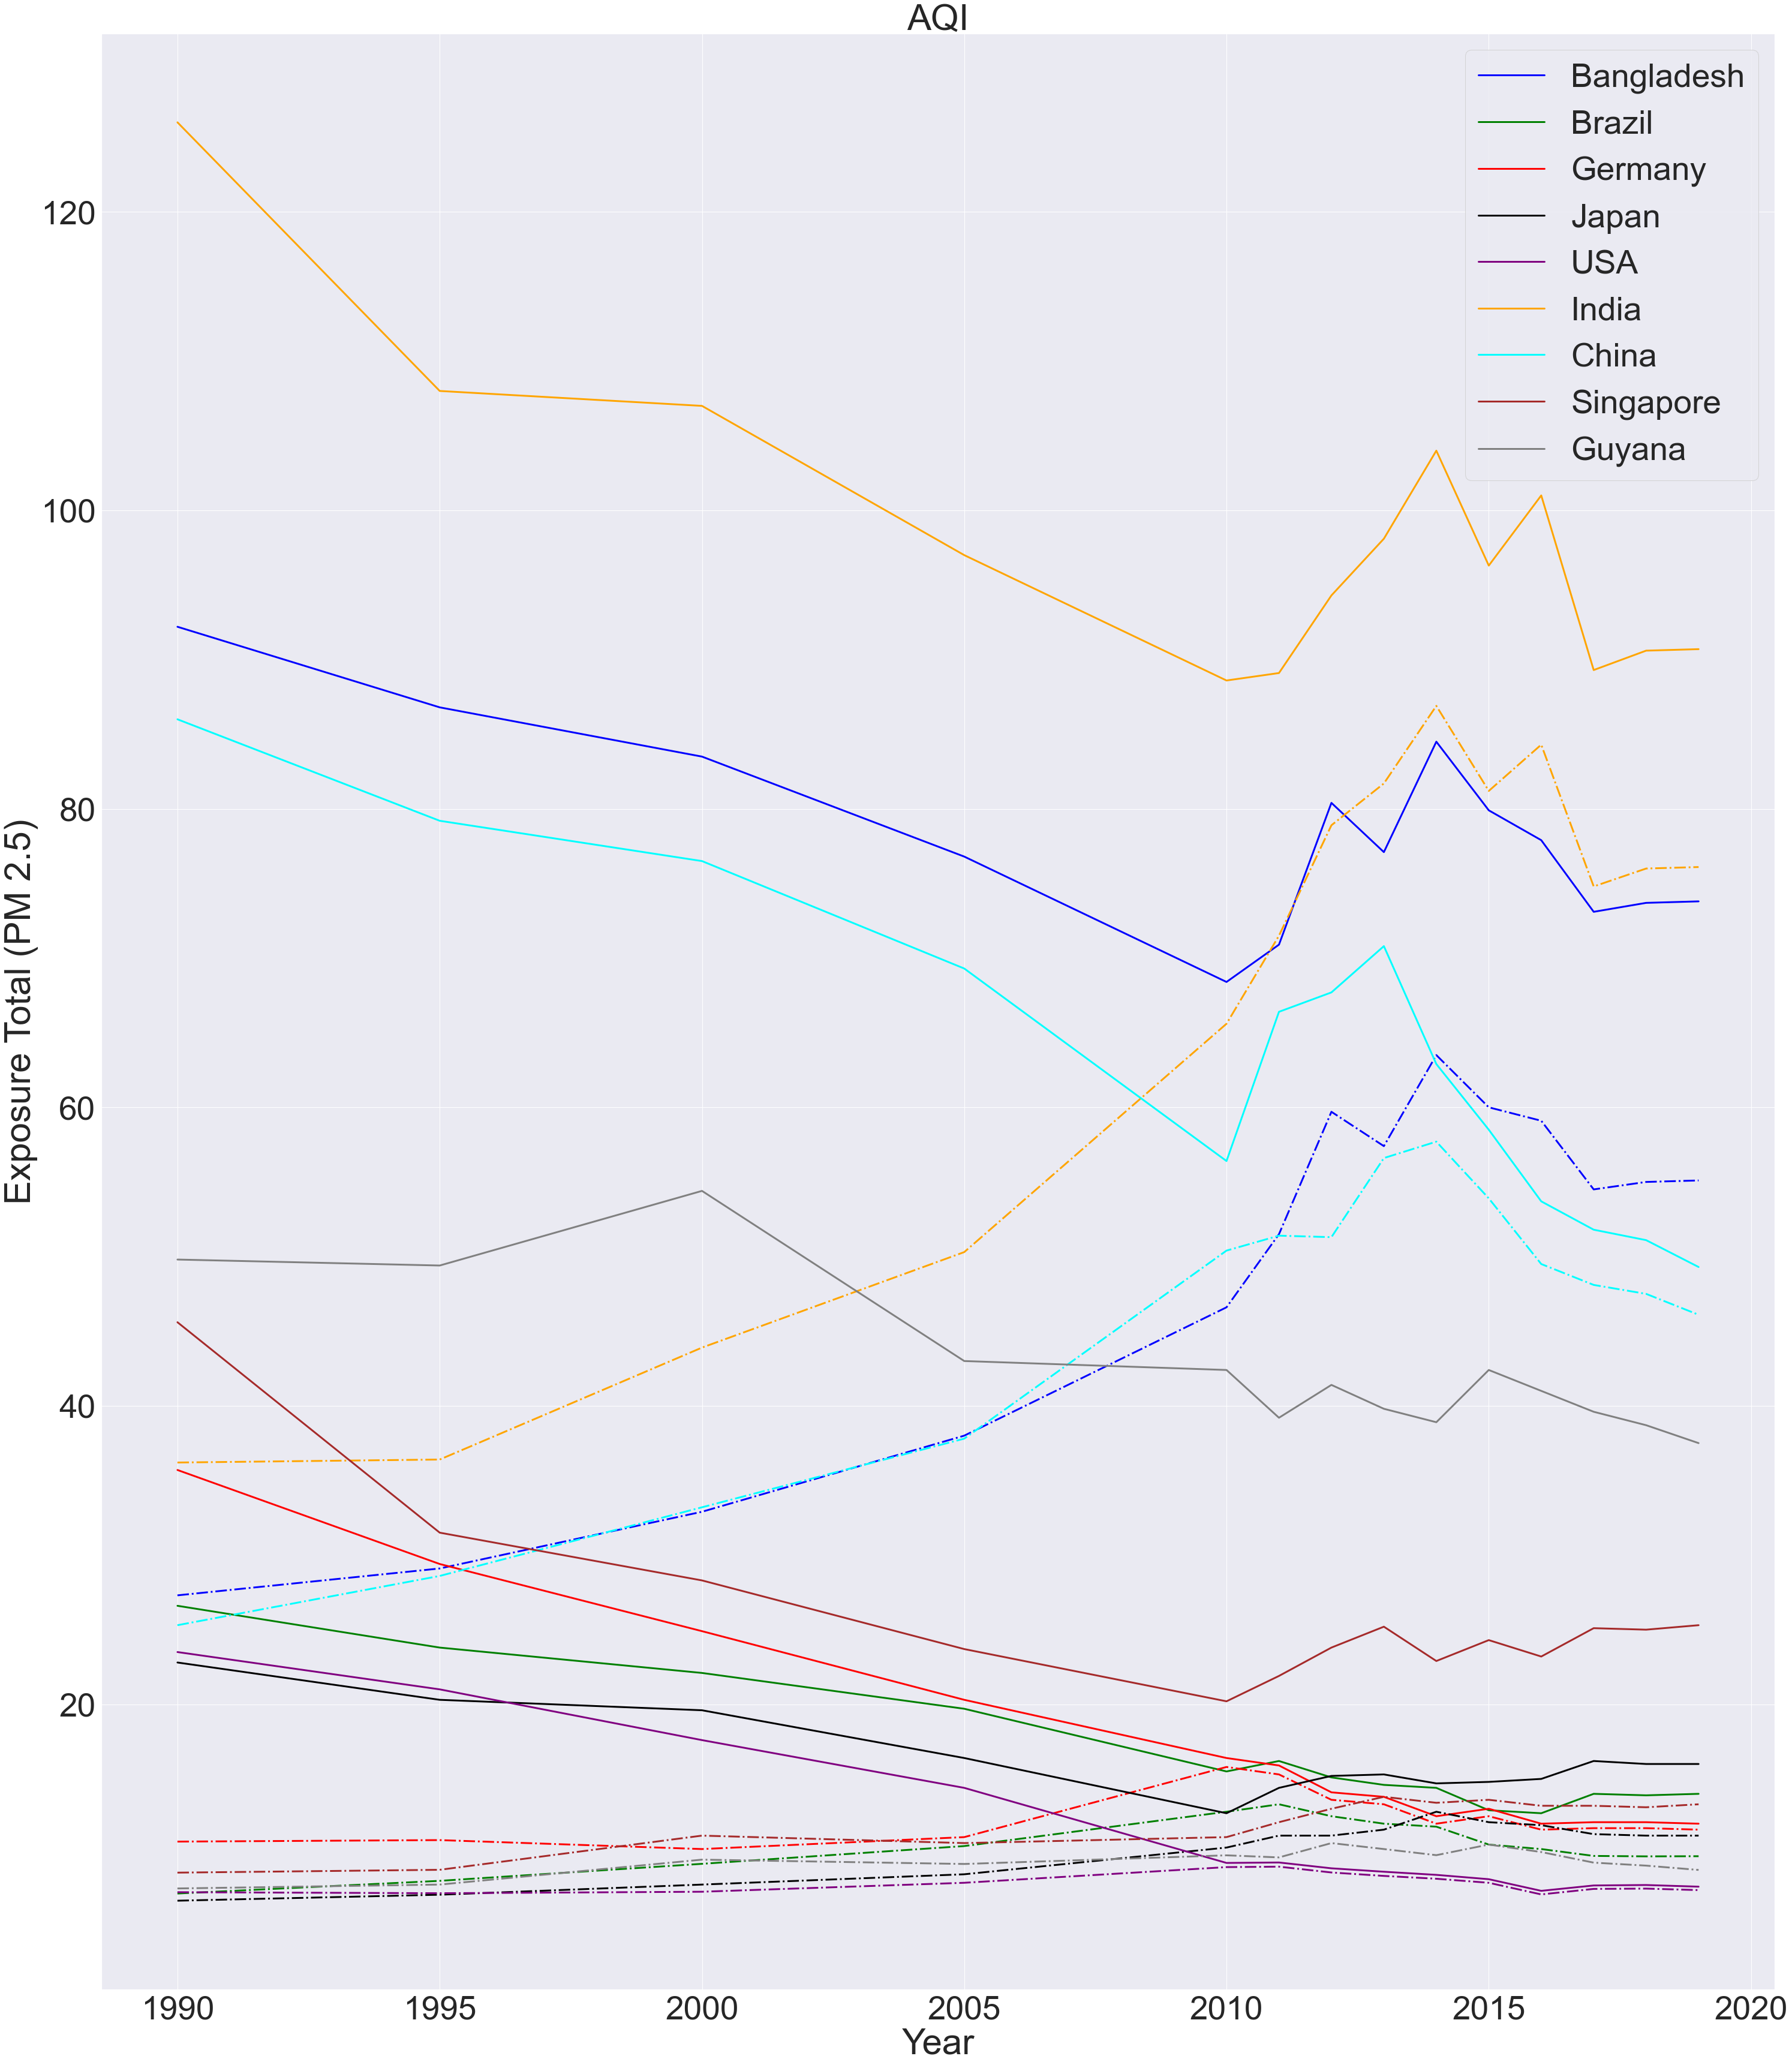

In [75]:
plt.figure(figsize = (50,60))
sns.set(style = 'dark')
sns.set(font_scale = 5)

bangladesh_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = bangladesh_aqi, color='blue',linestyle='-.', linewidth = 3)
bangladesh_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = bangladesh_aqi, color='blue',label='Bangladesh', linewidth = 3).set_title('Bangladesh AQI')

brazil_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = brazil_aqi, color = 'green', linestyle='-.', linewidth = 3)
brazil_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = brazil_aqi, color = 'green', label = 'Brazil', linewidth = 3).set_title('Brazil AQI')

germany_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = germany_aqi, color='red',linestyle='-.', linewidth = 3)
germany_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = germany_aqi, color = 'red', label = 'Germany', linewidth = 3).set_title('Germany AQI')

japan_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = japan_aqi, color = 'black', linestyle='-.', linewidth = 3)
japan_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = japan_aqi, color = 'black', label = 'Japan', linewidth = 3).set_title('Japan AQI')

USA_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = USA_aqi, color = 'purple', linestyle = '-.', linewidth = 3)
USA_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = USA_aqi, color = 'purple', label = 'USA', linewidth = 3).set_title('USA AQI')

india_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = india_aqi, color = 'orange', linestyle='-.', linewidth = 3)
india_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = india_aqi, color = 'orange', label = 'India', linewidth = 3).set_title('India AQI')

china_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = china_aqi, color = 'cyan', linestyle = '-.', linewidth = 3)
china_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = china_aqi, color = 'cyan', label = 'China', linewidth = 3).set_title('China AQI')

singapore_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = singapore_aqi, color = 'brown', linestyle = '-.', linewidth = 3)
singapore_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = singapore_aqi, color = 'brown', label = 'Singapore', linewidth = 3).set_title('Singapore AQI')

guyana_lower = sns.lineplot(x = 'Year', y = 'Exposure Lower', data = guyana_aqi, color = 'grey', linestyle = '-.', linewidth = 3)
guyana_upper = sns.lineplot(x = 'Year', y = 'Exposure Upper', data = guyana_aqi, color = 'grey', label = 'Guyana', linewidth = 3).set_title('AQI')


plt.ylabel('Exposure Total (PM 2.5)')
plt.show()


The dashed lines represent the Exposure Lower values, while the solid lines represent the Exposure Upper values for each country. Each country above is identified with a different colored line.

The maximum and minimum AQI levels for India is consistently higher than the other countries, followed by Bangladesh, China, Guyana, and Singapore. Germany, Brazil, Japan and USA tend to have a similar pattern and the minimum and maximum AQI level trends are consistently lower. India, Bangladesh, and China's minimum and maximum trends are similar, while Guyana and Singapore share a pattern. The maximum AQI levels have decreased over time in all the countries while the minimum AQI levels have increased over time. There was a temporary peak in minimum and maximum AQI levels in 2014, but has since decreased and evened out. The gap between maximum and minimum values for all the countries has become smaller over time, showing that these countries tend to fluctuate minimally with respect to annual AQI levels. 

In [76]:
sns.set(font_scale = 1)

## Unemployment Data Visualization
The next section focuses on just the unemployment data. We have a visualization that includes all 9 countries together in one image.

But, to visualize this dataset, we needed to first translate the data, switching the rows and columns in the dataset. That is done below:

In [77]:
#Translation
year_columns = [str(year) for year in range(1991, 2021)]

unemploy_rates_T = unemploy_rates.set_index("Country Name")[year_columns].T.reset_index()
unemploy_rates_T.head()

Country Name,index,Bangladesh,Brazil,China,Germany,Guyana,India,Japan,Singapore,United States
0,1991,2.20,6.37,2.4,5.32,11.82,5.55,2.1,2.18,6.80
1,1992,2.27,6.42,2.4,6.32,11.90,5.61,2.2,3.09,7.50
2,1993,2.36,6.03,2.7,7.68,12.01,5.72,2.5,3.07,6.90
3,1994,2.42,6.24,2.9,8.73,12.02,5.75,2.9,3.03,6.12
4,1995,2.47,6.42,3.0,8.16,11.99,5.75,3.2,3.30,5.65


In [78]:
countries_list = ["Bangladesh", "Brazil", "United States","Japan", "Germany", "India", "China", "Singapore", "Guyana"]

unemploy_rates_T = pd.DataFrame(unemploy_rates_T.to_numpy(),columns=['Year']+countries_list)

### Visualization of the Unemployment Data
Here is the graph containing all 9 countries:

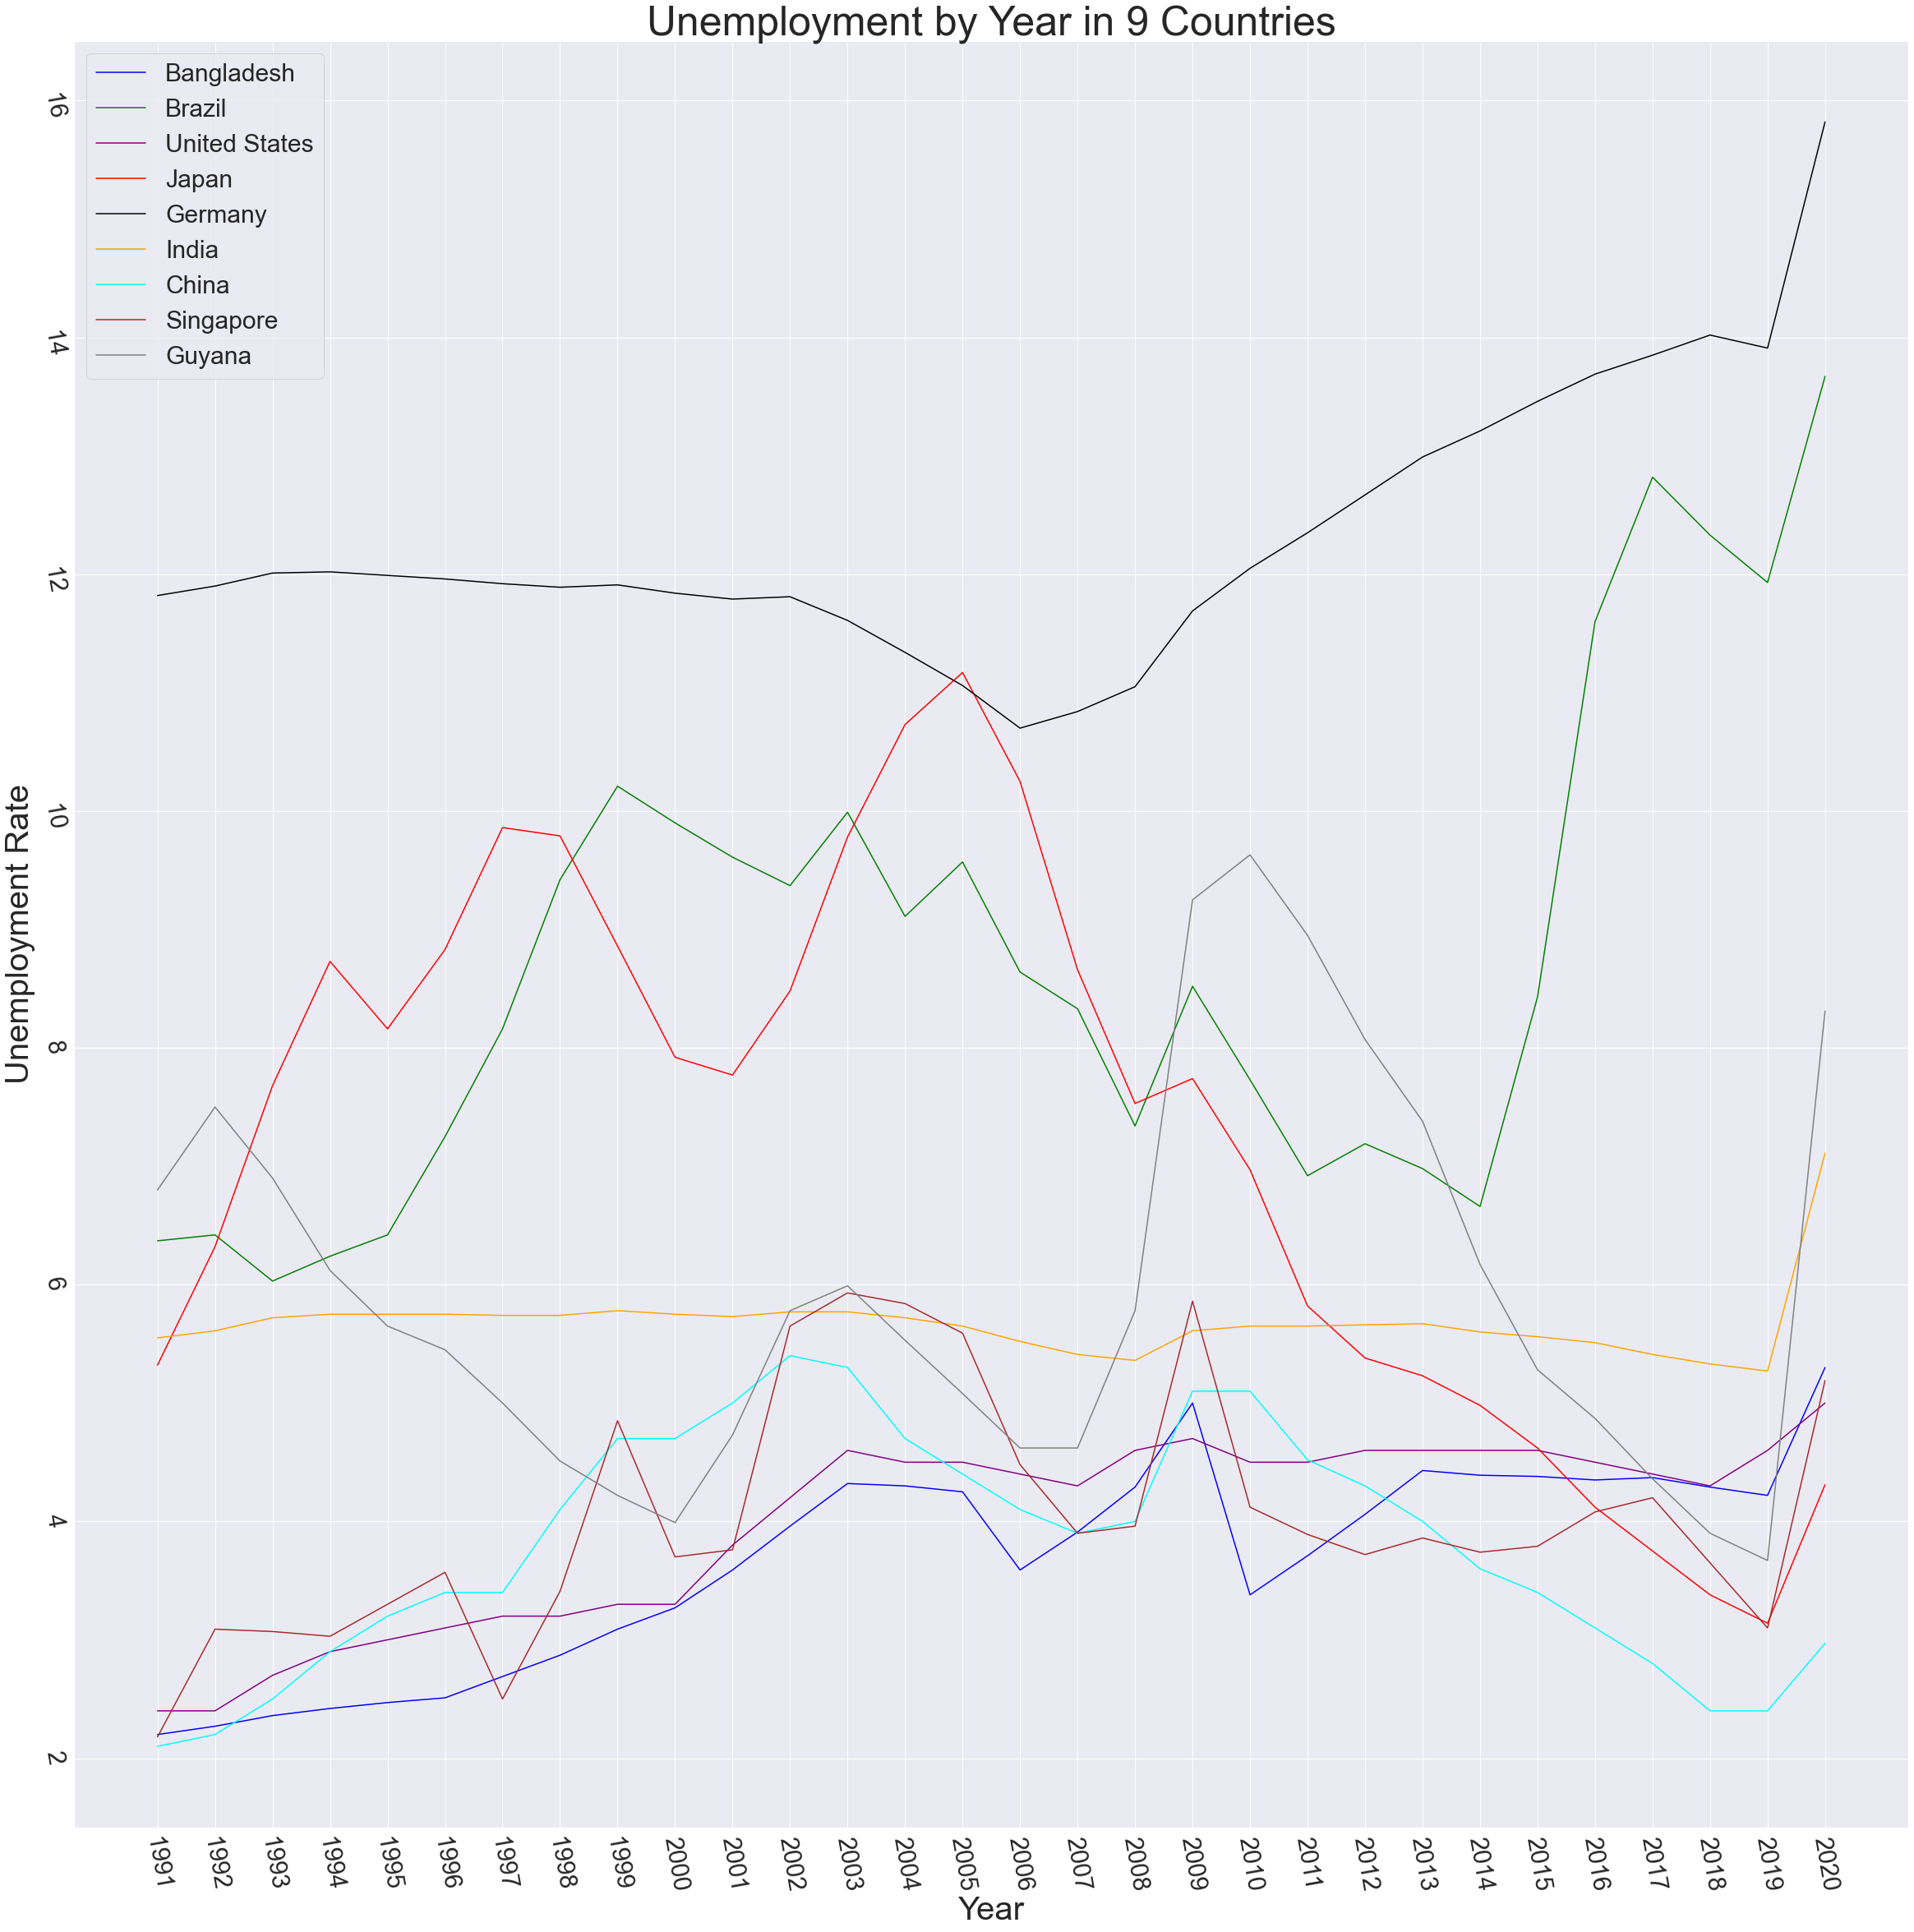

In [79]:
plt.figure(figsize = (40,40))
country_to_color = {"Bangladesh": "blue", "Brazil": "green", "Japan": "red", "Germany":"black","United States":"purple","India":"orange","China":"cyan","Singapore":"brown","Guyana":"grey"}



for country in countries_list:
    years = unemploy_rates_T["Year"]
    unemployment_rates = unemploy_rates_T[country]
    plt.plot(years, unemployment_rates, label=country, c = country_to_color[country])

    
plt.legend(loc=2, prop={'size': 30})
plt.title("Unemployment by Year in 9 Countries", fontsize=50)
plt.xlabel("Year", fontsize = 40)
plt.ylabel("Unemployment Rate", fontsize = 40)
plt.xticks(rotation = 100000, fontsize = 30)
plt.yticks(rotation = 10000, fontsize = 30)
plt.show()

## Inflation Data

### Bangladesh Inflation

In [80]:
bgd_inflation.describe()

,Year,Annual inflation rate
count,19.000000,19.000000
mean,2009.000000,6.382285
std,5.627314,2.296754
min,2000.000000,2.007174
25%,2004.500000,5.528574
50%,2009.000000,6.217504
75%,2013.500000,7.558971
max,2018.000000,11.395165


In [81]:
#plotting bangladesh inflation data
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = bgd_inflation['Annual inflation rate']).set_title('Bangladesh Inflation')
#inflation rate has an upward trend, with a sudden dip in 2009 and a peak in 2011 

### Brazil Inflation

In [82]:
braz_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,6.356652
std,5.91608,2.597089
min,2000.00000,3.446373
25%,2004.75000,4.711918
50%,2009.50000,6.266675
75%,2014.25000,6.913188
max,2019.00000,14.714920


In [83]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = braz_inflation['Annual inflation rate']).set_title('Brazil Inflation')
#inflation rate has an downward trend, with a peak in 2003 and a somewhat decline since then 

### Japan Inflation

In [84]:
jpn_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,0.105711
std,5.91608,0.916669
min,2000.00000,-1.352837
25%,2004.75000,-0.381354
50%,2009.50000,-0.030256
75%,2014.25000,0.469652
max,2019.00000,2.761954


In [85]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = jpn_inflation['Annual inflation rate']).set_title('Japan Inflation')
#inflation rate has an upward trend, with a sudden dip in 2009 and a peak in 2014

### Germany Inflation

In [86]:
germany_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,1.460059
std,5.91608,0.603847
min,2000.00000,0.312738
25%,2004.75000,1.086414
50%,2009.50000,1.507109
75%,2014.25000,1.795090
max,2019.00000,2.628382


In [87]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = germany_inflation['Annual inflation rate']).set_title('Germany Inflation')
#inflation rate has an unpredictable trend, with a major dip in 2009 and many peaks and troughs 

### USA Inflation

In [88]:
USA_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,2.170485
std,5.91608,1.076917
min,2000.00000,-0.355546
25%,2004.75000,1.613175
50%,2009.50000,2.200102
75%,2014.25000,2.928715
max,2019.00000,3.839100


In [89]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = USA_inflation['Annual inflation rate']).set_title('USA Inflation')
#absolute minimum in 2009

### India Inflation

In [90]:
ind_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,6.427607
std,5.91608,2.784142
min,2000.00000,2.490887
25%,2004.75000,4.187117
50%,2009.50000,5.834475
75%,2014.25000,8.476541
max,2019.00000,11.989390


In [91]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = ind_inflation['Annual inflation rate']).set_title('India Inflation')
#inflation rate has an upward trend, with a gradual increase until 2010 and a decrease in 2017

### China Inflation

In [92]:
chn_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,2.231126
std,5.91608,1.804929
min,2000.00000,-0.731975
25%,2004.75000,1.359669
50%,2009.50000,1.960822
75%,2014.25000,2.968259
max,2019.00000,5.925255


In [93]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = chn_inflation['Annual inflation rate']).set_title('China Inflation')
#inflation rate has a haywire trend, with a sudden dip in 2009 and a peak in 2011 

### Singapore Inflation

In [94]:
sgp_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,1.570576
std,5.91608,1.932830
min,2000.00000,-0.532286
25%,2004.75000,0.490559
50%,2009.50000,0.980123
75%,2014.25000,2.168345
max,2019.00000,6.627997


In [95]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = sgp_inflation['Annual inflation rate']).set_title('Singapore Inflation')
#inflation rate has an upward trend until 2008, with a sudden dip in 2009 and a peak in 2011 

### Guyana Inflation

In [96]:
sgp_inflation.describe()

,Year,Annual inflation rate
count,20.00000,20.000000
mean,2009.50000,1.570576
std,5.91608,1.932830
min,2000.00000,-0.532286
25%,2004.75000,0.490559
50%,2009.50000,0.980123
75%,2014.25000,2.168345
max,2019.00000,6.627997


In [97]:
#fig_dims = (16, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(ax = ax, data = guy_inflation['Annual inflation rate']).set_title('Guyana Inflation')
#inflation rate has an upward trend until 2007, with a sudden dip in 2009 and an absolute minimum in 2015

In [98]:
bgd_inflation["Year"] = bgd_inflation["Year"].astype(int)
braz_inflation["Year"] = braz_inflation["Year"].astype(int)
jpn_inflation["Year"] = jpn_inflation["Year"].astype(int)
germany_inflation["Year"] = germany_inflation["Year"].astype(int)
USA_inflation["Year"] = USA_inflation["Year"].astype(int)
ind_inflation["Year"] = ind_inflation["Year"].astype(int)
chn_inflation["Year"] = chn_inflation["Year"].astype(int)
sgp_inflation["Year"] = sgp_inflation["Year"].astype(int)
guy_inflation["Year"] = guy_inflation["Year"].astype(int)

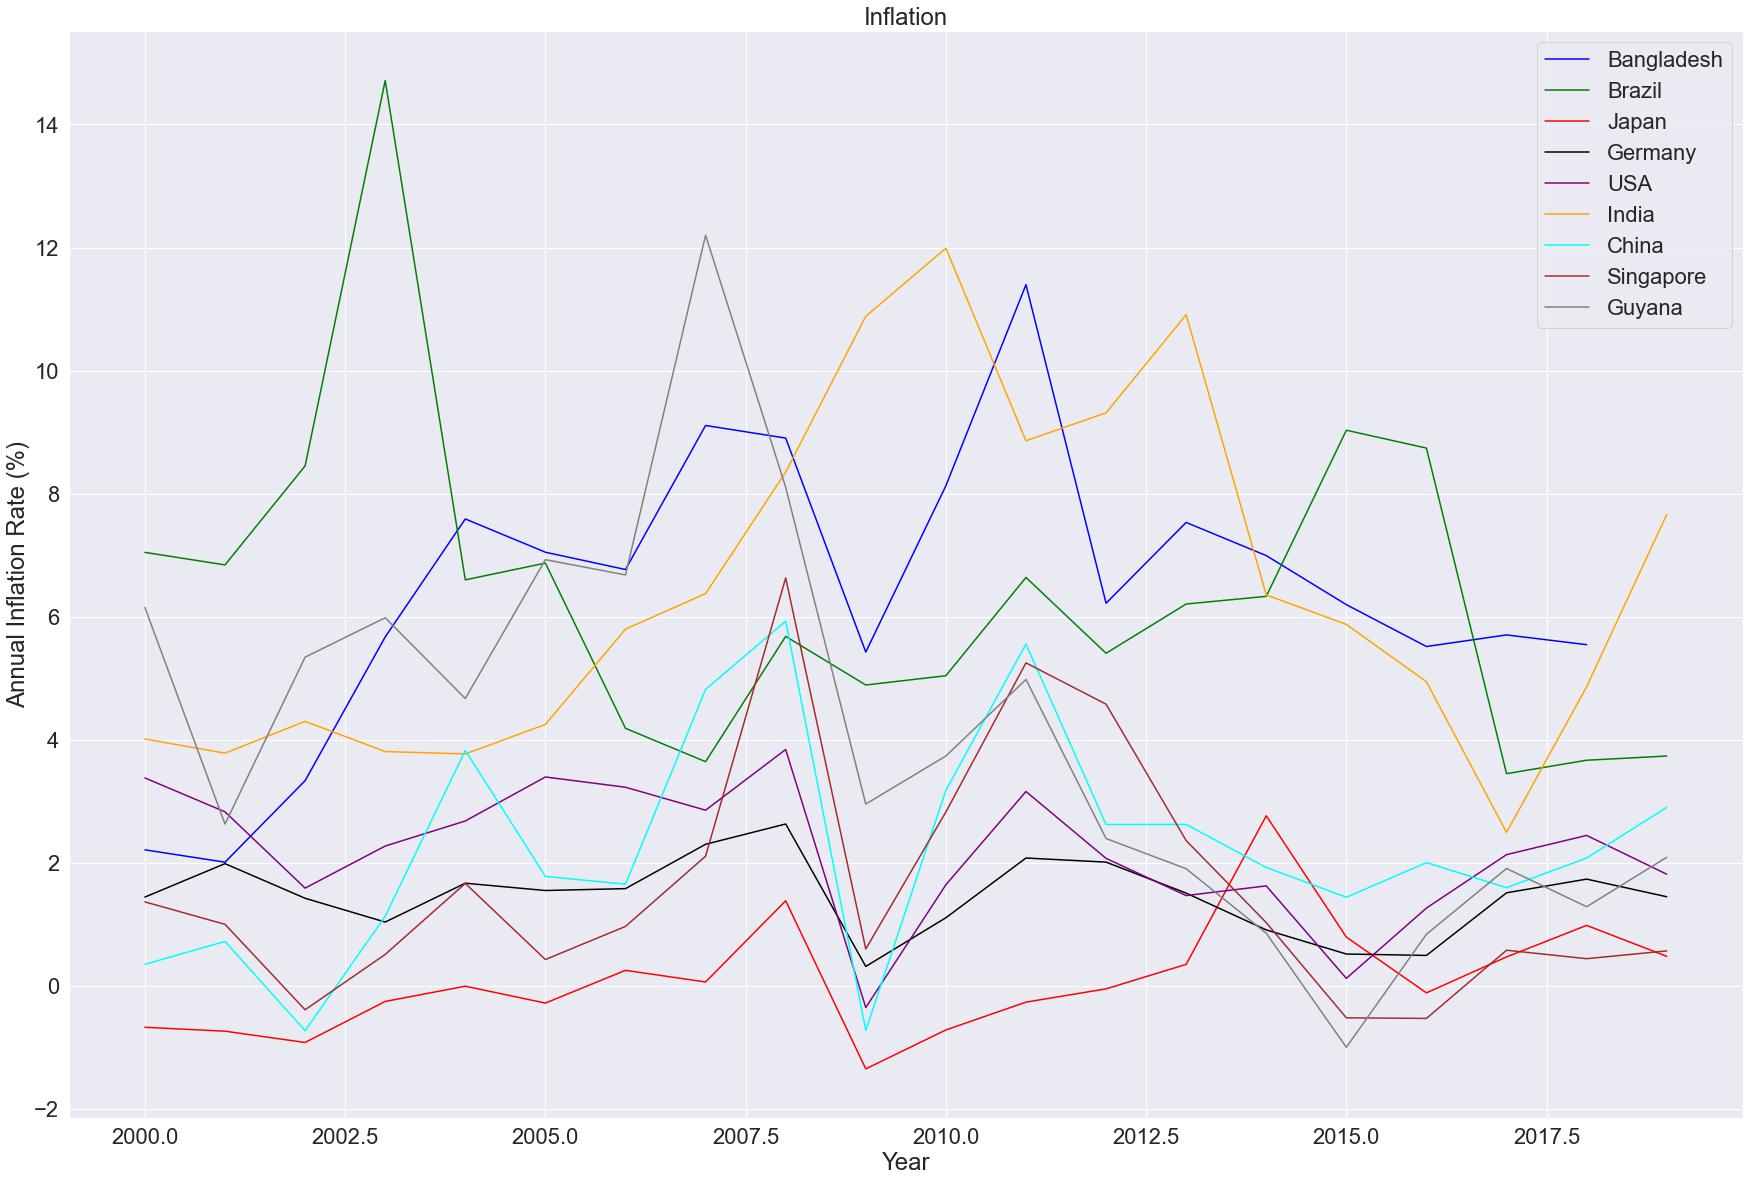

In [173]:
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)


#ax.xaxis.set_major_locator(plt.FixedLocator(7))

sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = bgd_inflation, color = 'blue', label = 'Bangladesh')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = braz_inflation, color = 'green', label = 'Brazil')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = jpn_inflation, color = 'red', label = 'Japan')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = germany_inflation, color = 'black', label = 'Germany')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = USA_inflation, color = 'purple', label = 'USA')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = ind_inflation, color = 'orange', label = 'India')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = chn_inflation, color = 'cyan', label = 'China')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = sgp_inflation, color = 'brown', label = 'Singapore')
sns.lineplot(x = 'Year', y = 'Annual inflation rate', ax = ax, data = guy_inflation, color = 'grey', label = 'Guyana').set_title('Inflation')


#ax.xaxis.set_major_formatter(plt.FixedFormatter(["2000", '2003', '2006', '2009', '2012', '2015', '2018']))

ax.xticks = (np.arange(7), ["2000", '2003', '2006', '2009', '2012', '2015', '2018'])
plt.ylabel('Annual Inflation Rate (%)')
plt.show()

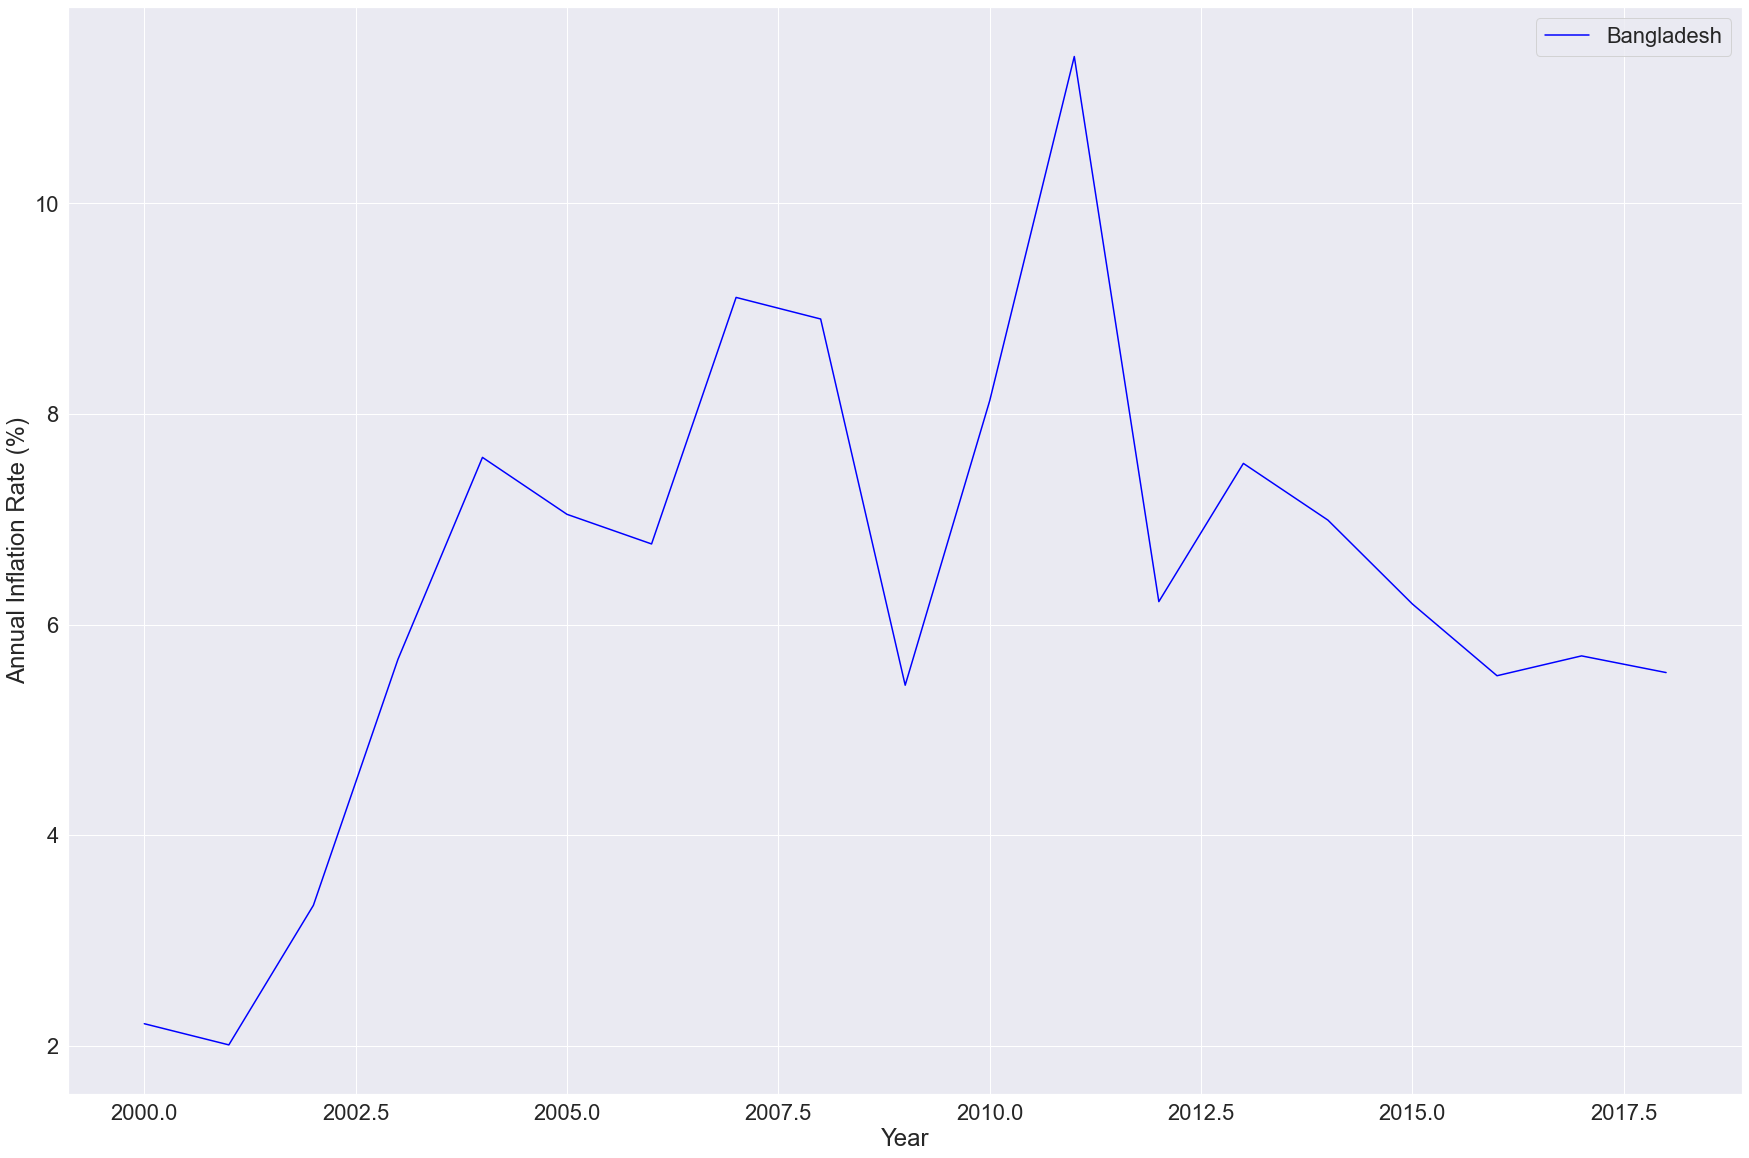

In [174]:
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.set(font_scale = 2)

g = sns.lineplot(x = 'Year', y = 'Annual inflation rate', data = bgd_inflation, color = 'blue', label = 'Bangladesh')

#g.xaxis.set_major_locator(plt.FixedLocator(7))
#g.xaxis.set_major_formatter(plt.FixedFormatter(["1999","2000", '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']))

g.set_xticks = np.arange(20)
g.set_xticklabels = (["2000", '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])

plt.ylabel('Annual Inflation Rate (%)')
plt.show()

From 2000-2004, Brazil had the highest inflation rate with Bangladesh gradually rising and passing the other countries in 2004. In 2007, Guyana had the highest inflation rate, India in 2009, Bangladesh again in 2011, India again in 2013, Bangladesh again in 2014, Brazil from 2014-2016, Bangladesh again in 2017, and India since 2018. Out of all the countries, Bangladesh and India consistently tend to have a higher inflation rate. On the other hand, Japan consistently has one of the lowest inflation rates, followed by China, Singapore, and Germany. USA tends to have a medium sized inflation rate compared to the other countries. Additionally, all the inflation rates dropped in 2009 with an exception of India, which was increasing. There was also an increase across most countries' inflation rates in 2011, with the exception of India. From this line graph, we can see that Japan, China, Guyana, and Singapore tend to have a similar pattern - their inflation rates increase and decrease around the same time. India and Germany tend to have a somewhat similar pattern, and Brazil, Bangladesh, and USA do not share a pattern with any of the countries observed. 

In [100]:
sns.set(font_scale = 1)

### Inflation and AQI Data Visualization - Bangladesh

In [101]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=bgd_aqi_inf_corr, fit_reg=True); 
#weak positive correlation

In [102]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=bgd_aqi_inf_corr, fit_reg=True); 
#stronger negative correlation

In [103]:
#abc = pd.plotting.scatter_matrix(bgd_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Data Visualization - Brazil

In [104]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=braz_aqi_inf_corr, fit_reg=True); 
#weak positive correlation

In [105]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=braz_aqi_inf_corr, fit_reg=True); 
#weaker positive correlation

In [106]:
#abc = pd.plotting.scatter_matrix(braz_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - Japan

In [107]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=japan_aqi_inf_corr, fit_reg=True); 
#somewhat strong positive correlation

In [108]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=japan_aqi_inf_corr, fit_reg=True); 
#somewhat strong negative correlation

In [109]:
#abc = pd.plotting.scatter_matrix(japan_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - Germany

In [110]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=germany_aqi_inf_corr, fit_reg=True); 
#somewhat strong positive correlation

In [111]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=germany_aqi_inf_corr, fit_reg=True); 
#weaker positive correlation

In [112]:
#abc = pd.plotting.scatter_matrix(germany_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - USA

In [113]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=USA_aqi_inf_corr, fit_reg=True); 
#no correlation

In [114]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=USA_aqi_inf_corr, fit_reg=True); 
#strong positive correlation

In [115]:
#abc = pd.plotting.scatter_matrix(USA_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - India

In [116]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=india_aqi_inf_corr, fit_reg=True); 
#somewhat strong positive correlation

In [117]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=india_aqi_inf_corr, fit_reg=True); 
#strong negative correlation

In [118]:
#abc = pd.plotting.scatter_matrix(india_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - China

In [119]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=china_aqi_inf_corr, fit_reg=True); 
#strong positive correlation

In [120]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=china_aqi_inf_corr, fit_reg=True); 
#weaker negative correlation

In [121]:
#abc = pd.plotting.scatter_matrix(china_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - Singapore

In [122]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=singapore_aqi_inf_corr, fit_reg=True); 
#somewhat strong negative correlation

In [123]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=singapore_aqi_inf_corr, fit_reg=True); 
#stronger negative correlation

In [124]:
#abc = pd.plotting.scatter_matrix(singapore_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

### Inflation and AQI Visualization - Guyana

In [125]:
#sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=guyana_aqi_inf_corr, fit_reg=True); 
#somewhat strong neagtive correlation

In [126]:
#sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=guyana_aqi_inf_corr, fit_reg=True); 
# strongish positive correlation

In [127]:
#abc = pd.plotting.scatter_matrix(guyana_aqi_inf_corr[['Exposure Lower','Exposure Upper','Annual inflation rate']], figsize=(15, 10))
#weak correlations all around 

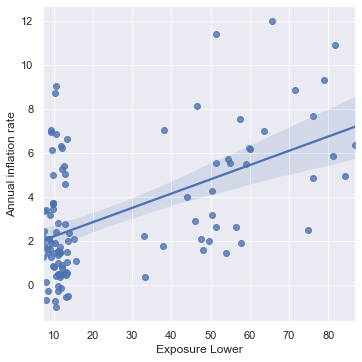

In [128]:
sns.lmplot(x='Exposure Lower', y='Annual inflation rate', data=inflation_aqi_df, fit_reg=True); 
#prediction from graph: extremely weak positive correlation

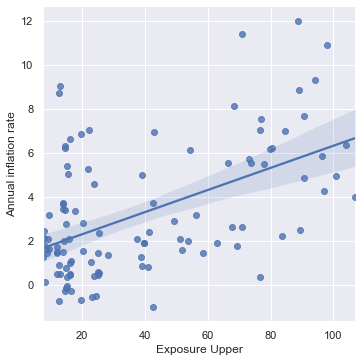

In [129]:
sns.lmplot(x='Exposure Upper', y='Annual inflation rate', data=inflation_aqi_df, fit_reg=True);
#prediction from graph: somewhat stronger positive correlation 

## Inferential Analysis  - Inflation and AQI

- __Null Hypothesis__: Inflation rate is not associated with minimum/maximum AQI levels. 
- __Alternative Hypothesis__: Inflation rate is associated with minimum/maximum AQI levels. 
- Alpha/Significance Level: 0.05
- Test Statistic: Pearson (r) Test 

We chose to use a Pearson (r) test to determine if there is a relationship between the quantitative variables inflation rate and AQI levels for each country. The AQI levels are divided into minimum and maximum exposure values for each year, so we will be performing Pearson (r) tests on both values provided. Since our dataset contains quantitative data, we can use the Pearson (r) test. 
- All null hypotheses are in the form of: "The distribution of inflation rate is the same for X and Y", with each country as the different variable. 

### Bangladesh r Test

In [130]:
stats.pearsonr(bgd_aqi_inf_corr['Exposure Lower'], bgd_aqi_inf_corr['Annual inflation rate'])
#r value = 0.2666
#p-value = 0.429

(0.2666077423962272, 0.4280803516862409)

Due to the large p value (0.429 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimim AQI levels. There is also a small positive r value of 0.2666. This number suggests that the data is loosely positively correlated. 

In [131]:
stats.pearsonr(bgd_aqi_inf_corr['Exposure Upper'], bgd_aqi_inf_corr['Annual inflation rate'])
#r value = -0.57352
#p-value = 0.065

(-0.5735262147939214, 0.0650814621399965)

Due to the large p value (0.065 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a medium-sized negative r value of -0.574. This number suggests that the data is somewhat negatively correlated, but not strong enough for a correlation to be determined. 

### Brazil r Test

In [132]:
stats.pearsonr(braz_aqi_inf_corr['Exposure Lower'], braz_aqi_inf_corr['Annual inflation rate'])
#r = 0.089
#p = 0.789

(0.08653782830000359, 0.7891479924284075)

Due to the large p value (0.789 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimim AQI levels. There is also a small positive r value of 0.089. This number suggests that the data is loosely positively correlated. 

In [133]:
stats.pearsonr(braz_aqi_inf_corr['Exposure Upper'], braz_aqi_inf_corr['Annual inflation rate'])
#r = 0.108
#p = 0.738

(0.10799807310195904, 0.7383135539438404)

Due to the large p value (0.738 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a small positive r value of 0.108. This number suggests that the data is loosely positively correlated. 

### Japan r Test

In [134]:
stats.pearsonr(japan_aqi_inf_corr['Exposure Lower'], japan_aqi_inf_corr['Annual inflation rate'])
#r = 0.669
#p = 0.017

(0.6690907415219116, 0.01733843248867872)

Due to the small p value (0.017 < 0.05), we reject the null hypothesis. Inflation rate may be associated with minimim AQI levels. There is also a strong positive correlation, as determined by the large positive r value of 0.669. 

In [135]:
stats.pearsonr(japan_aqi_inf_corr['Exposure Upper'], japan_aqi_inf_corr['Annual inflation rate'])
#r = -0.471
#p = 0.123

(-0.14882726315408426, 0.6443485502360761)

Due to the large p value (0.123 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a medium-sized negative r value of -0.471. This number suggests that the data is somewhat negatively correlated.

### Germany r Test

In [136]:
stats.pearsonr(germany_aqi_inf_corr['Exposure Lower'], germany_aqi_inf_corr['Annual inflation rate'])
#r = 0.219
#p = 0.494

(0.21925690718654786, 0.49354589597839676)

Due to the large p value (0.494 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a small positive r value of 0.219. This number suggests that the data is loosely positively correlated.

In [137]:
stats.pearsonr(germany_aqi_inf_corr['Exposure Upper'], germany_aqi_inf_corr['Annual inflation rate'])
#r = 0.220
#p = 0.492

(0.21978264608614606, 0.4924840203124923)

Due to the large p value (0.492 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a small positive r value of 0.220. This number suggests that the data is loosely positively correlated.

### USA r Test

In [138]:
stats.pearsonr(USA_aqi_inf_corr['Exposure Lower'], USA_aqi_inf_corr['Annual inflation rate'])
#r = 0.023
#p = 0.945

(0.022503283822263853, 0.944658199786384)

Due to the large p value (0.945 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a very small positive r value of 0.023. This number suggests that the data is very very loosely (if at all) positively correlated.

In [139]:
stats.pearsonr(USA_aqi_inf_corr['Exposure Upper'], USA_aqi_inf_corr['Annual inflation rate'])
#r = 0.669
#p = 0.017

(0.6689914335737526, 0.01736118603205071)

Due to the small p value (0.017 < 0.05), we reject the null hypothesis. Inflation rate may be associated with maximum AQI levels. There is also a strong positive correlation, as determined by the large positive r value of 0.669. 

### India r Test

In [140]:
stats.pearsonr(india_aqi_inf_corr['Exposure Lower'], india_aqi_inf_corr['Annual inflation rate'])
#r = 0.237
#p = 0.458

(0.23729073572172873, 0.45772066914365594)

Due to the large p value (0.457 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a small positive r value of 0.237. This number suggests that the data is  loosely positively correlated.

In [141]:
stats.pearsonr(india_aqi_inf_corr['Exposure Upper'], india_aqi_inf_corr['Annual inflation rate'])
#r = -0.298
#p = 0.347

(-0.29801195204894415, 0.3468023623289847)

Due to the large p value (0.347 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a small negative r value of -0.298. This number suggests that the data is  loosely negatively correlated.

### China r Test

In [142]:
stats.pearsonr(china_aqi_inf_corr['Exposure Lower'], china_aqi_inf_corr['Annual inflation rate'])
#r = 0.420
#p = 0.183

(0.41197295190246946, 0.18328170593088572)

Due to the large p value (0.183 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a small positive r value of 0.183. This number suggests that the data is  loosely positively correlated.

In [143]:
stats.pearsonr(china_aqi_inf_corr['Exposure Upper'], china_aqi_inf_corr['Annual inflation rate'])
#r = -0.085
#p = 0.794

(-0.0845006168804183, 0.7940163728262448)

Due to the large p value (0.794 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a very small negative r value of -0.085. This number suggests that the data is very loosely negatively correlated.

### Singapore r Test

In [144]:
stats.pearsonr(singapore_aqi_inf_corr['Exposure Lower'], singapore_aqi_inf_corr['Annual inflation rate'])
#r = -0.214
#p = 0.504

(-0.21395313944313588, 0.5043155963824919)

Due to the large p value (0.504 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a small negative r value of -0.214. This number suggests that the data is  loosely negatively correlated.

In [145]:
stats.pearsonr(singapore_aqi_inf_corr['Exposure Upper'], singapore_aqi_inf_corr['Annual inflation rate'])
#r = -0.351
#p = 0.264

(-0.3505728464474141, 0.26389323873272613)

Due to the large p value (0.264 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a small negative r value of -0.351. This number suggests that the data is  loosely negatively correlated.

### Guyana r Test

In [146]:
stats.pearsonr(guyana_aqi_inf_corr['Exposure Lower'], guyana_aqi_inf_corr['Annual inflation rate'])
#r = -0.382
#p = 0.220

(-0.38199204390760655, 0.22043931805864647)

Due to the large p value (0.220 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with minimum AQI levels. There is also a small negative r value of -0.382. This number suggests that the data is  loosely negatively correlated.

In [147]:
stats.pearsonr(guyana_aqi_inf_corr['Exposure Upper'], guyana_aqi_inf_corr['Annual inflation rate'])
#r = 0.514
#p = 0.087

(0.5139141833127473, 0.08741844102469444)

Due to the large p value (0.087 > 0.05), we fail to reject the null hypothesis. Inflation rate is not associated with maximum AQI levels. There is also a medium-sized positive r value of 0.514. This number suggests that the data is somewhat positively correlated.

### All Countries r Test

In [148]:
stats.pearsonr(inflation_aqi_df['Exposure Lower'], inflation_aqi_df['Annual inflation rate'])
#r = 0.530
#p = 4.372 e^-9

(0.5299116429304511, 4.371878685952694e-09)

Due to the small p value (4.372 e^-9 < 0.05), we reject the null hypothesis. Inflation rate may be associated with minimum AQI levels. There is also a medium-sized positive correlation, as determined by the positive r value of 0.530. This number suggests that the data is somewhat positively correlated.  

In [149]:
stats.pearsonr(inflation_aqi_df['Exposure Upper'], inflation_aqi_df['Annual inflation rate'])
#r = 0.518
#p = 1.155 e^-8

(0.5173883965330923, 1.1547164700791409e-08)

Due to the small p value (1.155 e^-8 < 0.05), we reject the null hypothesis. Inflation rate may be associated with maximum AQI levels. There is also a medium-sized positive correlation, as determined by the positive r value of 0.518. This number suggests that the data is somewhat positively correlated.  

### Inflation and AQI r Test Summary

When comparing AQI minimum/maximum levels to inflation rates of all the countries over a span of set years, we observe that there may be an association between inflation levels and minimum/maximim AQI levels. The p values are much smaller than the alpha level, and we reject the null hypothesis. 

However, when comparing AQI levels with inflation rates for each individual country (rather than all the countries at once), we tend to observe no association between inflation and minimum/maximum AQI levels for the majority of countries. We fail to reject our null hypothesis in the majority of comparisons. Given our prior results, we can conclude that the possible association found between these two variables can be explained by other factors that cause these countries to differ. These factors explain the potential association that may be present when looking at all countries that we don't observe when looking at individual countries. 

For some countries, there is a somewhat strong correlation between the two variables. However, since these correlations are present in only the minimum/maximum AQI levels (instead of both), we cannot assume that inflation and AQI are correlated. 

## Poverty

In [150]:
# Poverty Dataset
pov

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
543,Bangladesh,Gini index (World Bank estimate),NaN,33.4,NaN,NaN,NaN,NaN,33.2,NaN,...,32.1,NaN,NaN,NaN,NaN,NaN,32.4,NaN,NaN,NaN
804,Brazil,Gini index (World Bank estimate),59.0,NaN,58.4,58.1,57.6,56.5,56.3,55.6,...,NaN,52.9,53.5,52.8,52.1,51.9,53.3,53.3,53.9,NaN
1123,China,Gini index (World Bank estimate),38.7,NaN,NaN,42.0,NaN,NaN,40.9,NaN,...,43.7,42.4,42.2,39.7,39.2,38.6,38.5,NaN,NaN,NaN
1558,Germany,Gini index (World Bank estimate),NaN,28.8,30.3,29.9,30.0,30.4,32.1,31.3,...,30.2,30.5,NaN,31.1,NaN,31.7,31.9,NaN,NaN,NaN
2689,Guyana,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3124,India,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,34.4,NaN,NaN,...,NaN,35.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3414,Japan,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.1,NaN,NaN,32.9,NaN,NaN,NaN,NaN,NaN,NaN
5995,Singapore,Gini index (World Bank estimate),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7242,United States,Gini index (World Bank estimate),NaN,40.1,NaN,NaN,NaN,40.3,NaN,NaN,...,40.0,NaN,NaN,40.7,NaN,NaN,41.1,NaN,NaN,NaN


In [151]:
#Translation
year_columns = [str(year) for year in range(2000, 2021)]

pov_T = unemploy_rates.set_index("Country Name")[year_columns].T.reset_index()
pov_T.head()

Country Name,index,Bangladesh,Brazil,China,Germany,Guyana,India,Japan,Singapore,United States
0,2000,3.27,9.90,3.3,7.92,11.84,5.75,4.7,3.70,3.99
1,2001,3.59,9.61,3.8,7.77,11.79,5.73,5.0,3.76,4.73
2,2002,3.96,9.37,4.2,8.48,11.81,5.77,5.4,5.65,5.78
3,2003,4.32,9.99,4.6,9.78,11.61,5.77,5.3,5.93,5.99
4,2004,4.30,9.11,4.5,10.73,11.34,5.72,4.7,5.84,5.53


In [152]:
countries_list = ["Bangladesh", "Brazil", "United States","Japan", "Germany", "India", "China", "Singapore", "Guyana"]

pov_T = pd.DataFrame(pov_T.to_numpy(),columns=['Year']+countries_list)

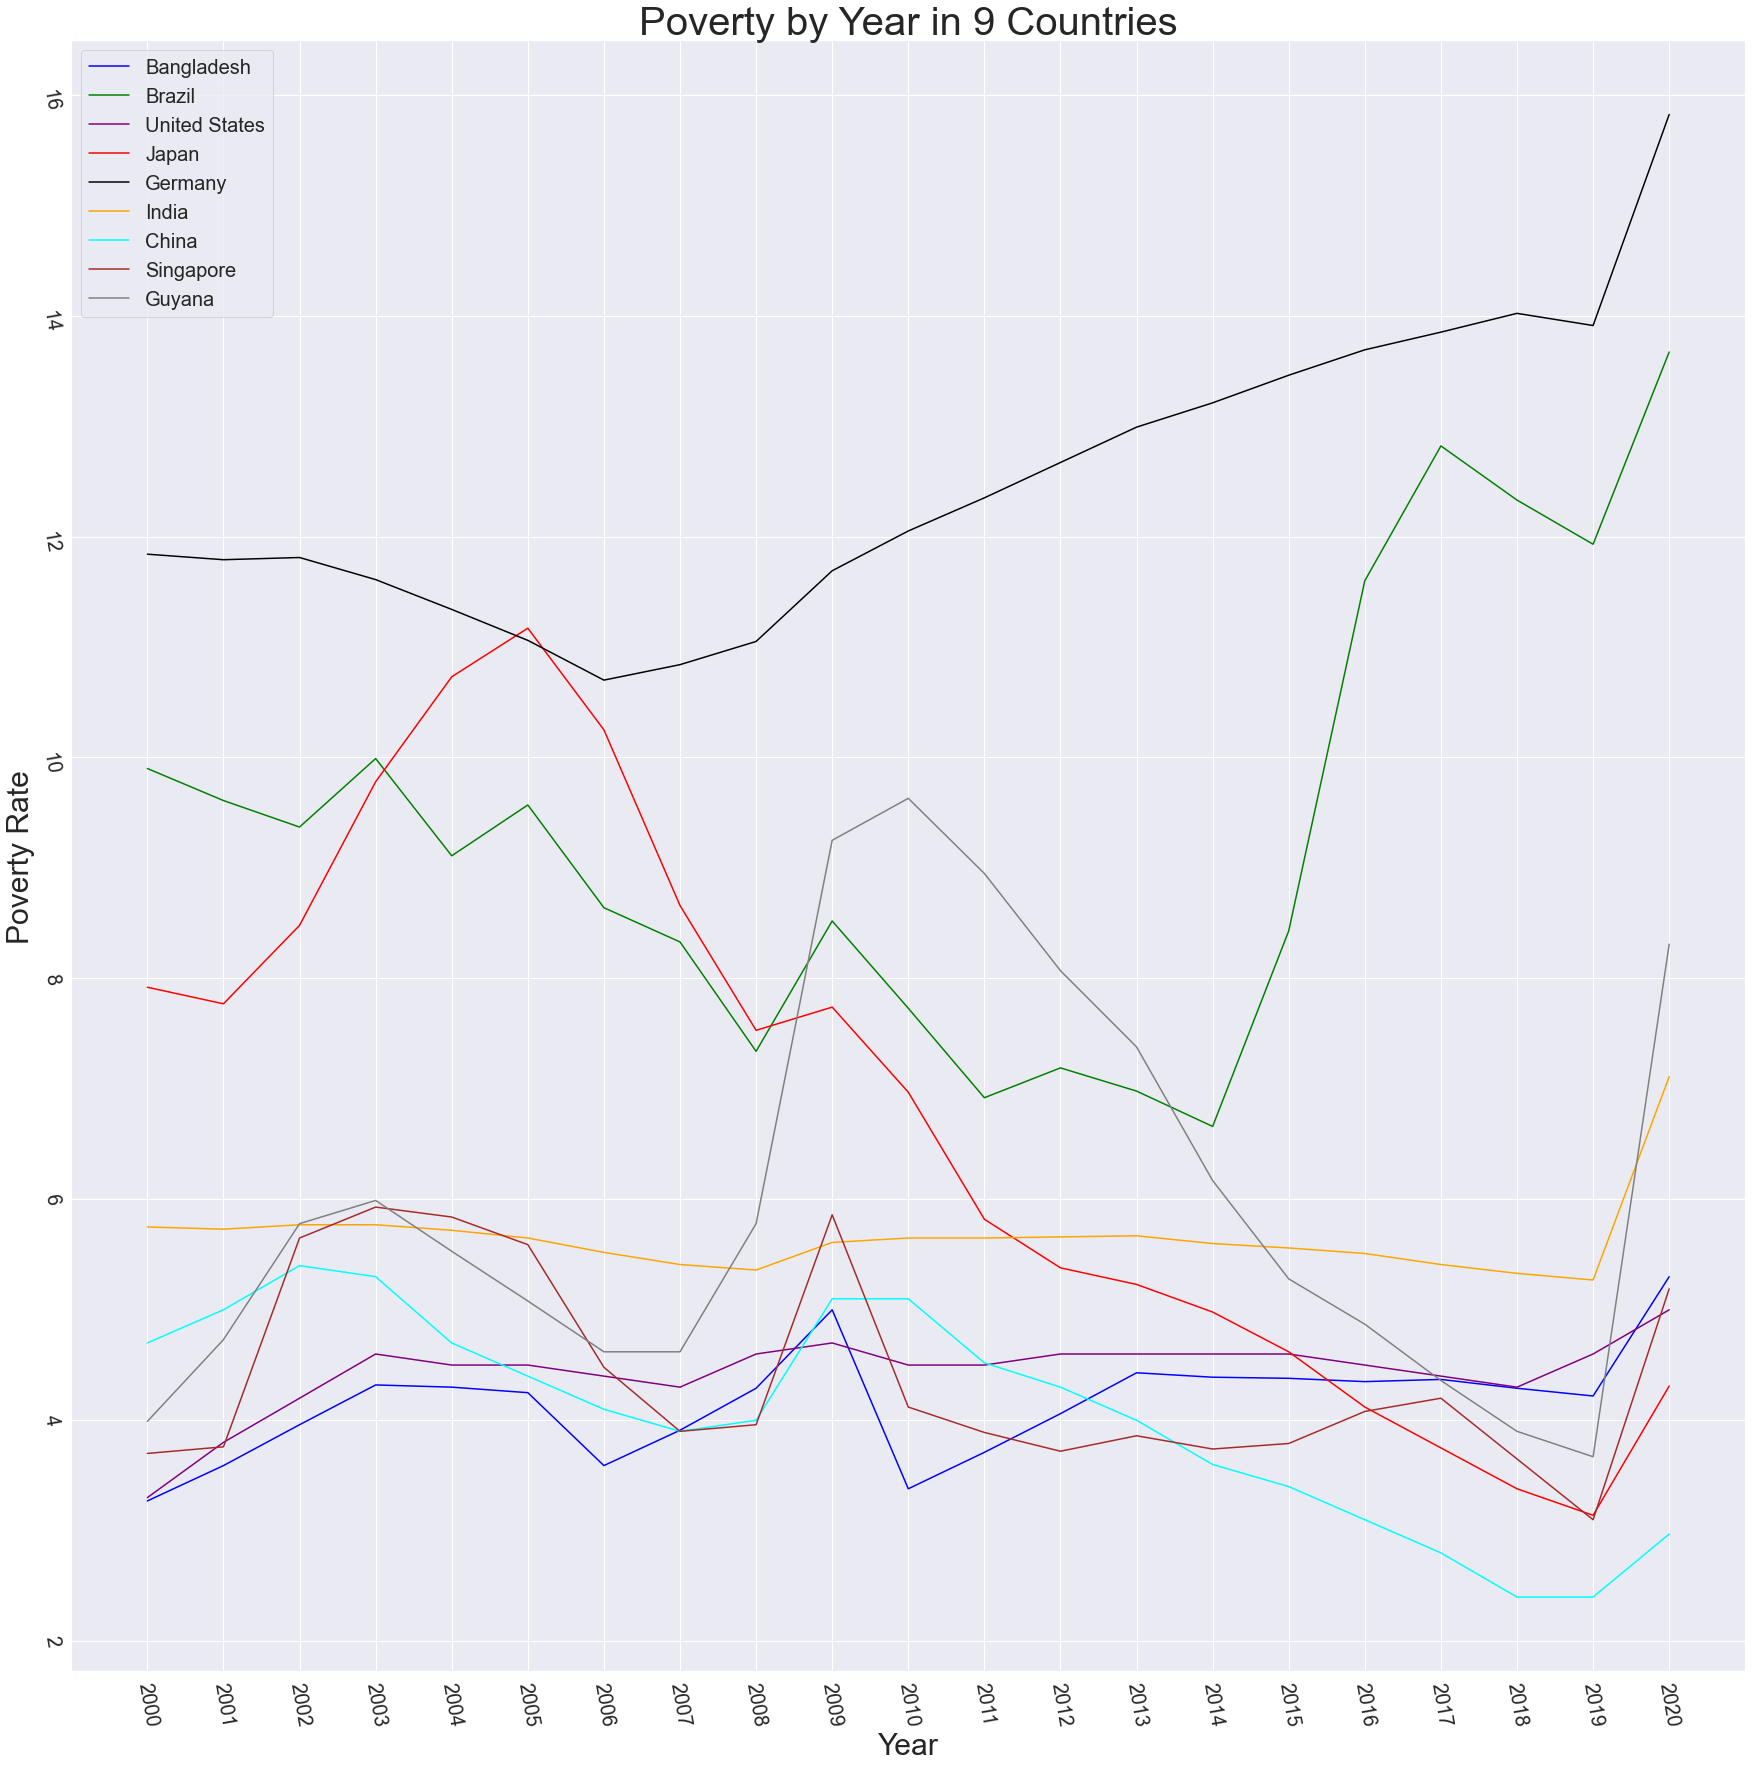

In [153]:
plt.figure(figsize = (30,30))
country_to_color = {"Bangladesh": "blue", "Brazil": "green", "Japan": "red", "Germany":"black","United States":"purple","India":"orange","China":"cyan","Singapore":"brown","Guyana":"grey"}



for country in countries_list:
    years = pov_T["Year"]
    poverty_num = pov_T[country]
    plt.plot(years, poverty_num, label=country, c = country_to_color[country])

    
plt.legend(loc=2, prop={'size': 20})
plt.title("Poverty by Year in 9 Countries", fontsize=40)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("Poverty Rate", fontsize = 30)
plt.xticks(rotation = 100000, fontsize = 20)
plt.yticks(rotation = 10000, fontsize = 20)
plt.show()